<center><h1> Unsupervised Learning on Country Data </h1></center>

<a id="import"></a>
# 1️⃣ㅣImport Libraries

In [1]:
#Import libraries
#loading dataset
import pandas as pd
import numpy as np

#visualisation
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.express as px
import seaborn as sns
from kneed import KneeLocator

# data modeling
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import ward,dendrogram,linkage,cut_tree
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import DBSCAN
from sklearn.cluster import AgglomerativeClustering
from sklearn.mixture import GaussianMixture


# Model performance
from sklearn.preprocessing import  StandardScaler
from sklearn import metrics
from sklearn.metrics import silhouette_score
from tqdm import tqdm
from sklearn.metrics import calinski_harabasz_score
from sklearn.metrics import davies_bouldin_score
from sklearn.decomposition import PCA

#warnings
import warnings
warnings.simplefilter(action='ignore')

<a id="data"></a>
# 2️⃣ㅣLoad data💾 

In [2]:
# reading data into dataframe
df=pd.read_csv(r'F:\Machine Learning\data\Country-data.csv')

df

country  child_mort  exports  health  imports  income  \
0            Afghanistan        90.2     10.0    7.58     44.9    1610   
1                Albania        16.6     28.0    6.55     48.6    9930   
2                Algeria        27.3     38.4    4.17     31.4   12900   
3                 Angola       119.0     62.3    2.85     42.9    5900   
4    Antigua and Barbuda        10.3     45.5    6.03     58.9   19100   
..                   ...         ...      ...     ...      ...     ...   
162              Vanuatu        29.2     46.6    5.25     52.7    2950   
163            Venezuela        17.1     28.5    4.91     17.6   16500   
164              Vietnam        23.3     72.0    6.84     80.2    4490   
165                Yemen        56.3     30.0    5.18     34.4    4480   
166               Zambia        83.1     37.0    5.89     30.9    3280   

     inflation  life_expec  total_fer   gdpp  
0         9.44        56.2       5.82    553  
1         4.49        76.3       1.65   4090  
2        16.10        76.5       2.89   4460  
3        22.40        60.1       6.16   3530  
4         1.44        76.8       2.13  12200  
..         ...         ...        ...    ...  
162       2.62        63.0       3.50   2970  
163      45.90        75.4       2.47  13500  
164      12.10        73.1       1.95   1310  
165      23.60        67.5       4.67   1310  
166      14.00        52.0       5.40   1460  

[167 rows x 10 columns]

In [3]:
df.shape

(167, 10)

In [4]:
# lists name of columns
df.columns

Index(['country', 'child_mort', 'exports', 'health', 'imports', 'income',
       'inflation', 'life_expec', 'total_fer', 'gdpp'],
      dtype='object')

- country : Name of the country
- child_mort : Death of children under 5 years of age per 1000 live births
- exports : Exports of goods and services per capita. Given as %age of the GDP per capita
- health : Total health spending per capita. Given as %age of GDP per capita
- imports : Imports of goods and services per capita. Given as %age of the GDP per capita
- Income : Net income per person
- Inflation : The measurement of the annual growth rate of the Total GDP
- life_expec : The average number of years a new born child would live if the current mortality patterns are to rem...
- total_fer : The number of children that would be born to each woman if the current age-fertility rates remain th...
- gdpp : The GDP per capita. Calculated as the Total GDP divided by the total population.

### <a id="eda"></a>
# 3️⃣ ㅣData Preprocessing

In [5]:
#to view some basic statistical details of train data
df.describe()

child_mort     exports      health     imports         income  \
count  167.000000  167.000000  167.000000  167.000000     167.000000   
mean    38.270060   41.108976    6.815689   46.890215   17144.688623   
std     40.328931   27.412010    2.746837   24.209589   19278.067698   
min      2.600000    0.109000    1.810000    0.065900     609.000000   
25%      8.250000   23.800000    4.920000   30.200000    3355.000000   
50%     19.300000   35.000000    6.320000   43.300000    9960.000000   
75%     62.100000   51.350000    8.600000   58.750000   22800.000000   
max    208.000000  200.000000   17.900000  174.000000  125000.000000   

        inflation  life_expec   total_fer           gdpp  
count  167.000000  167.000000  167.000000     167.000000  
mean     7.781832   70.555689    2.947964   12964.155689  
std     10.570704    8.893172    1.513848   18328.704809  
min     -4.210000   32.100000    1.150000     231.000000  
25%      1.810000   65.300000    1.795000    1330.000000  
50%      5.390000   73.100000    2.410000    4660.000000  
75%     10.750000   76.800000    3.880000   14050.000000  
max    104.000000   82.800000    7.490000  105000.000000

In [6]:
# checking the number of rows and columns in dataset
rows,col=df.shape
print ('Row:' , rows,'\nColumns:',col)

Row: 167 
Columns: 10


In [7]:
#lets see if we have any duplicated entries and the result shows that all entries are unique
df.duplicated().sum()

0

In [8]:
#getting some information about the datafram
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


In [9]:
## printing total numbers of Unique value in the dataframe. 
df.nunique()

country       167
child_mort    139
exports       147
health        147
imports       151
income        156
inflation     156
life_expec    127
total_fer     138
gdpp          157
dtype: int64

In [10]:
# Find the total number of missing values in the dataframe
df.isnull().sum()

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

- No null values present in the data!

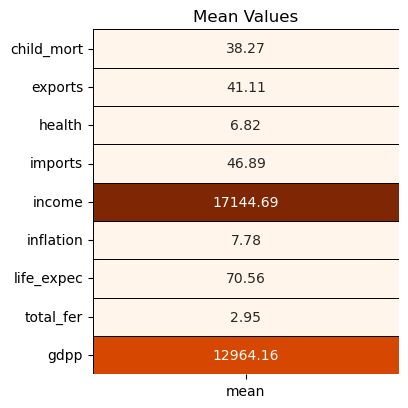

In [11]:
#mean value 
fig,ax = plt.subplots(nrows = 1,ncols = 1,figsize = (5,5))

colors = ['#FF781F','#2D2926']
plt.subplot(1,1,1)
sns.heatmap(df.describe().T[['mean']],cmap = 'Oranges',annot = True,fmt = '.2f',linecolor = 'black',linewidths = 0.4,cbar = False);
plt.title('Mean Values');

fig.tight_layout(pad = 4)

In [12]:
# categorical and numerical features
col = list(df.columns)
col.remove('country')
categorical_features = ['country']
numerical_features = [*col]
print('Categorical Features :',*categorical_features)
print('Numerical Features :',*numerical_features)

Categorical Features : country
Numerical Features : child_mort exports health imports income inflation life_expec total_fer gdpp


### <a id="eda"></a>
# 4️⃣ㅣExploratory Data Analysis (EDA)📊

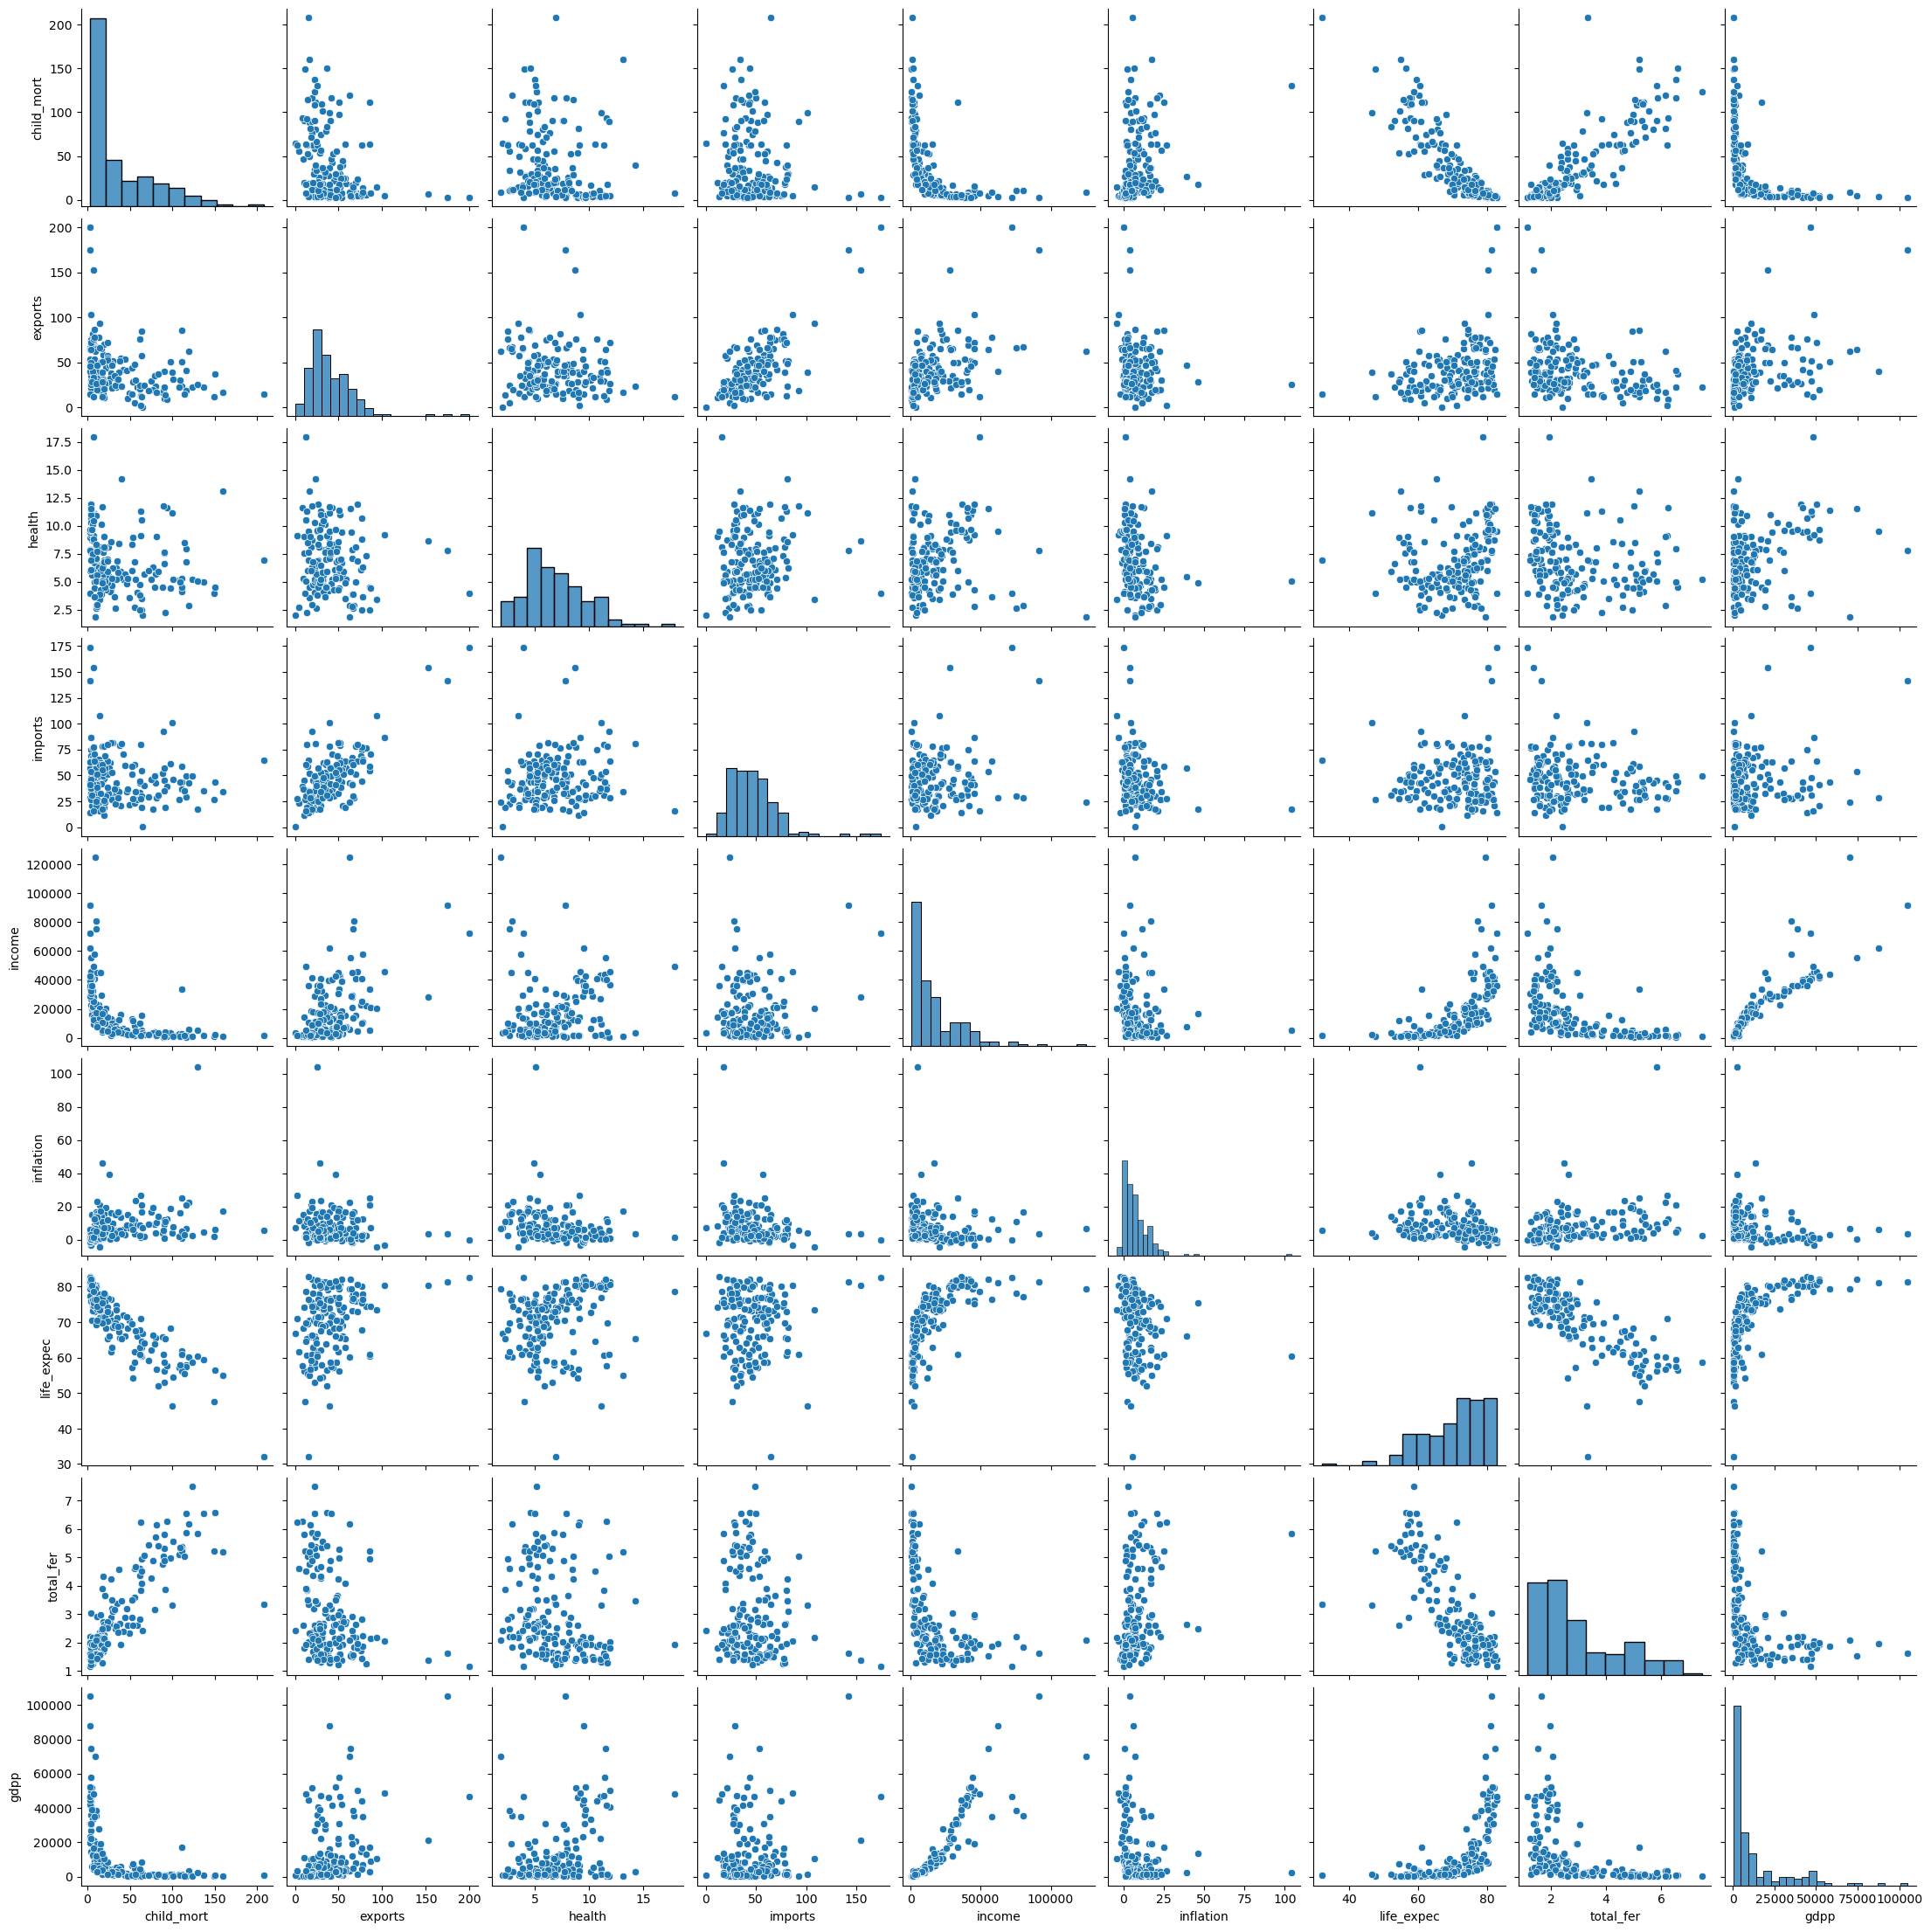

In [13]:
sns.pairplot(df, diag_kind="hist",  markers=["o", "s", "D"])

- Linear relation is found between gdpp-income,imports-exports,total_fer-child_mort
- Rectangular hyperbola curve is generated by gdpp-child_mort.
- If gdpp is HIGH:
   - child mortality is LOW
   - income is HIGH
   - inflation is LOW
   - life expectancy is HIGH
   - total fertility is LOW
   - health, imports and exports are MEDIUM

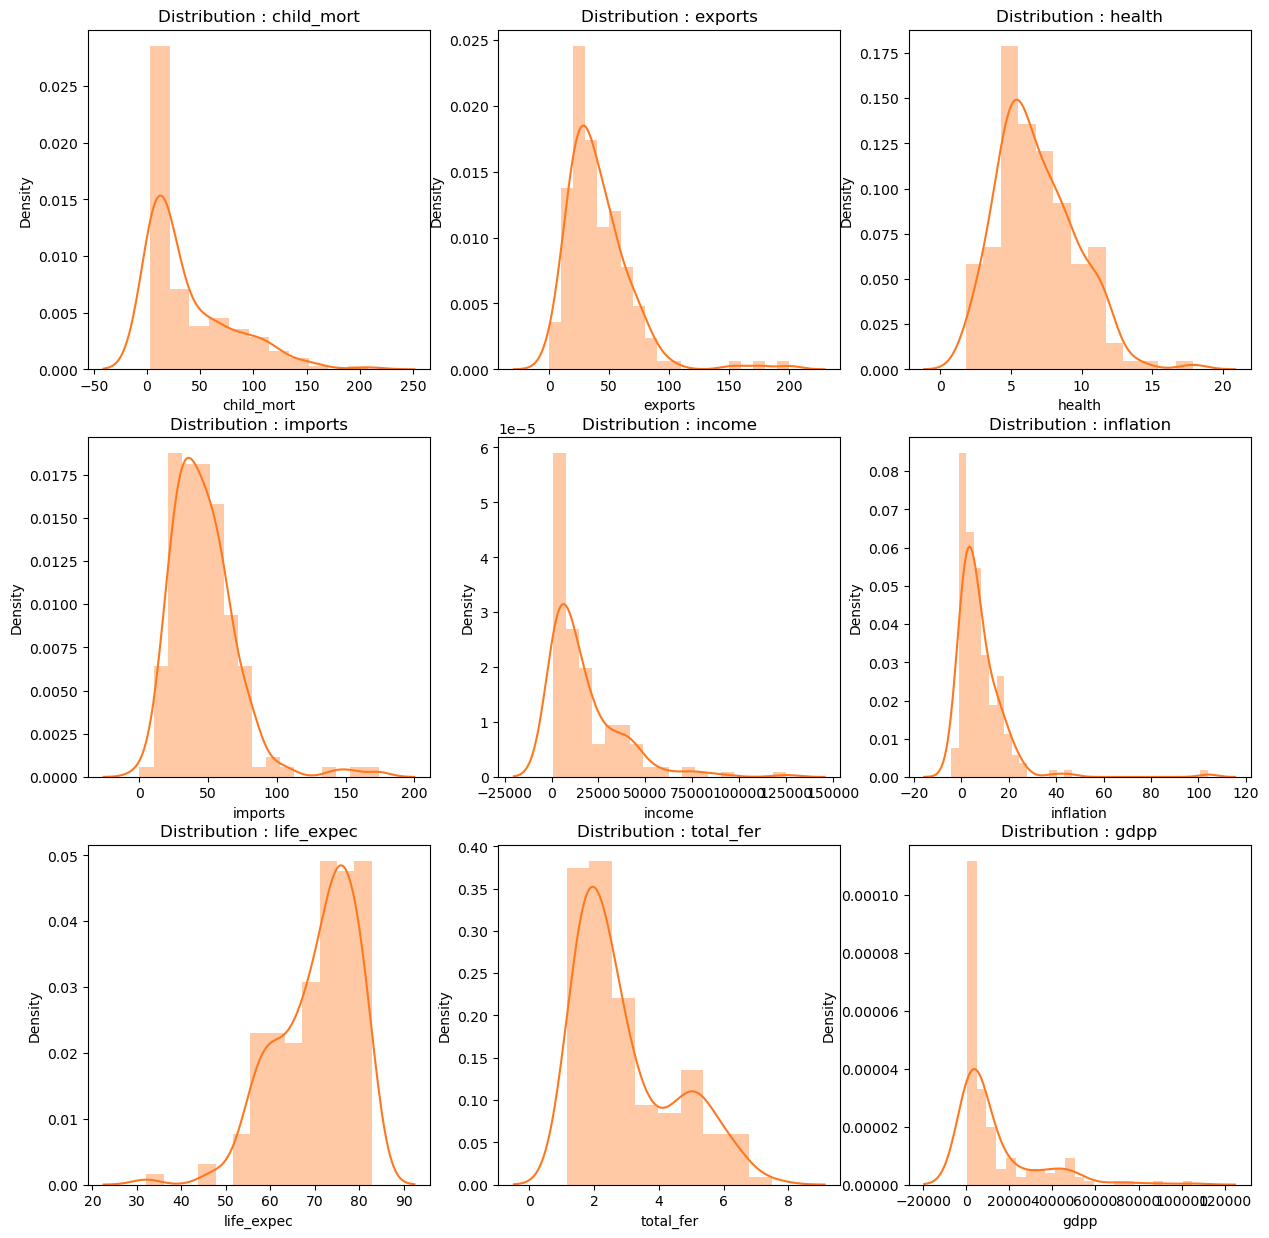

In [14]:
#Distribution of Features
fig, ax = plt.subplots(nrows = 3,ncols = 3,figsize = (15,15))
for i in range(len(numerical_features)):
    plt.subplot(3,3,i+1)
    sns.distplot(df[numerical_features[i]],color = colors[0])
    title = 'Distribution : ' + numerical_features[i]
    plt.title(title)
plt.show()

- life_expec displays a left or negatively skewed data distribution.
- health displays a normally distrubuted data.
- All the remaining features show a right or positively skewed data distribution.
- Data distribution of country is not put out as it has text data and it has the same number of unique values as the length of the dataframe.

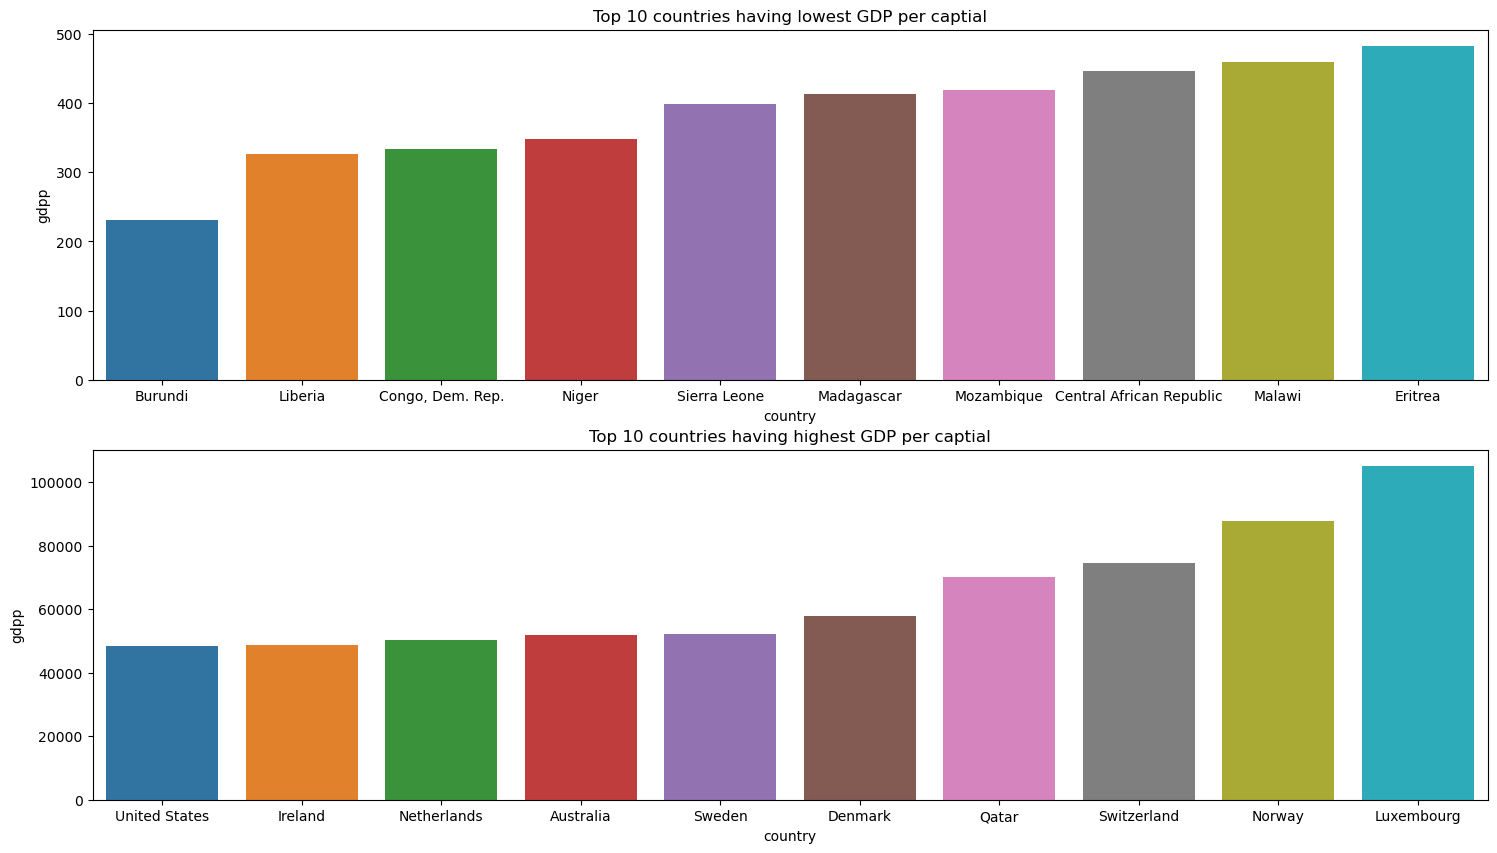

In [15]:
gdpp = df.sort_values(by = ['gdpp'], ascending = True)
plt.figure(figsize = [18,10])
plt.subplot(2,1,1)
sns.barplot(gdpp['country'].head(10),gdpp['gdpp'].head(10))
plt.title('Top 10 countries having lowest GDP per captial')
plt.subplot(2,1,2)
sns.barplot(gdpp['country'].tail(10),gdpp['gdpp'].tail(10))
plt.title('Top 10 countries having highest GDP per captial')
plt.show()

In [16]:
# Top 5 and Bottom 5 countries of each Category
def get5(col,return_df=False,place='Top'):
    
    c5 = df[['country',col]].sort_values(by=col,ascending=False)
    if place=='Top':
        c5 = c5.head()
    elif place=='Bottom':
        c5 = c5.tail()
    else:
        raise ValueError('place can be "Top" or "Bottom"')
    plt.figure(figsize=(7,7))
    plt.title(f'{place} 5 countries in {col} category')
    sns.barplot(data=c5,y='country',x=col)
    
    plt.show()
    if return_df:
        return top5

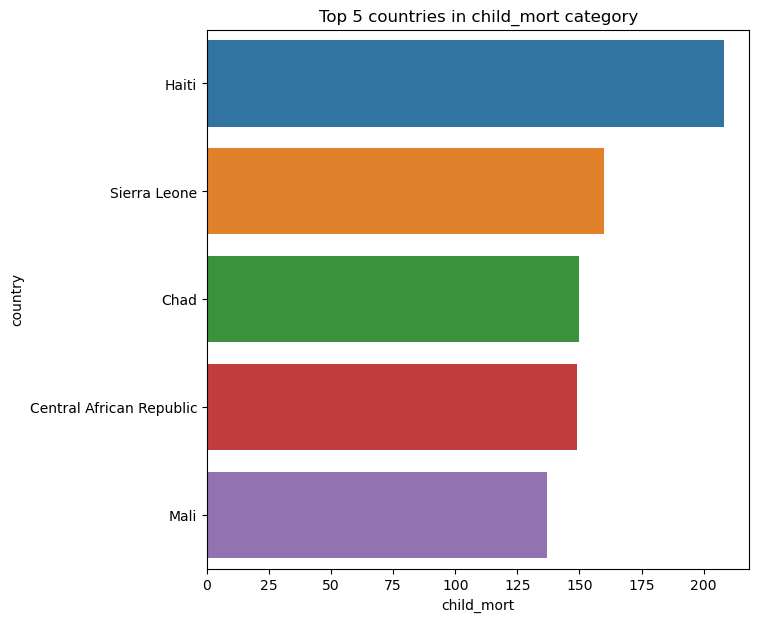

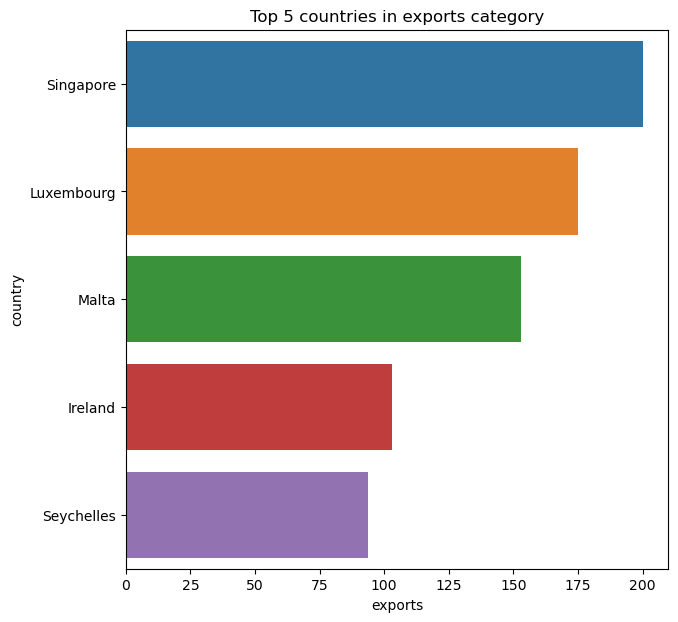

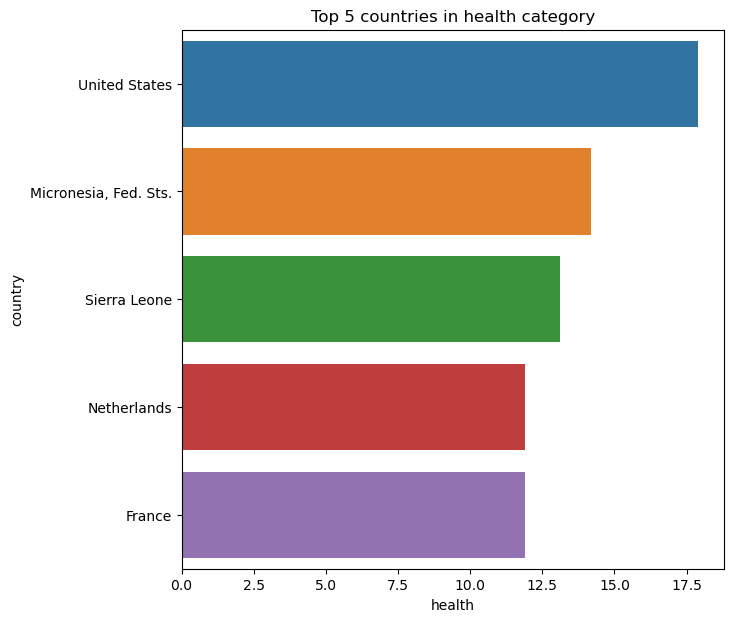

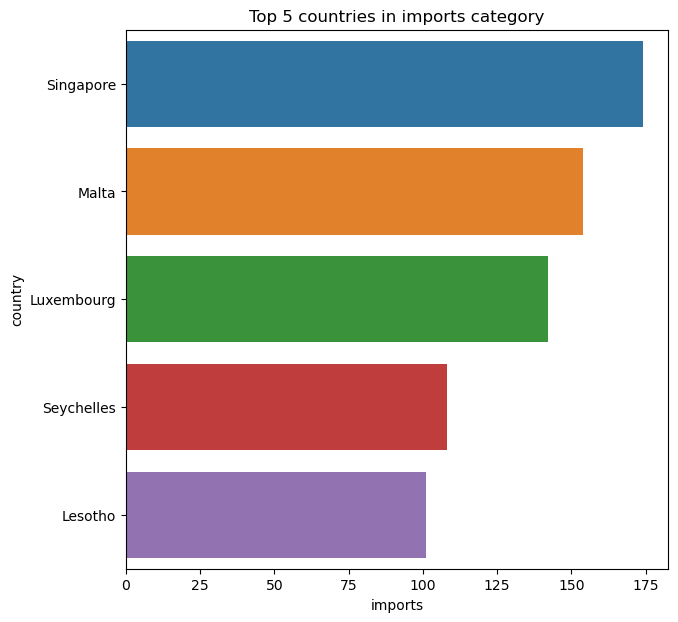

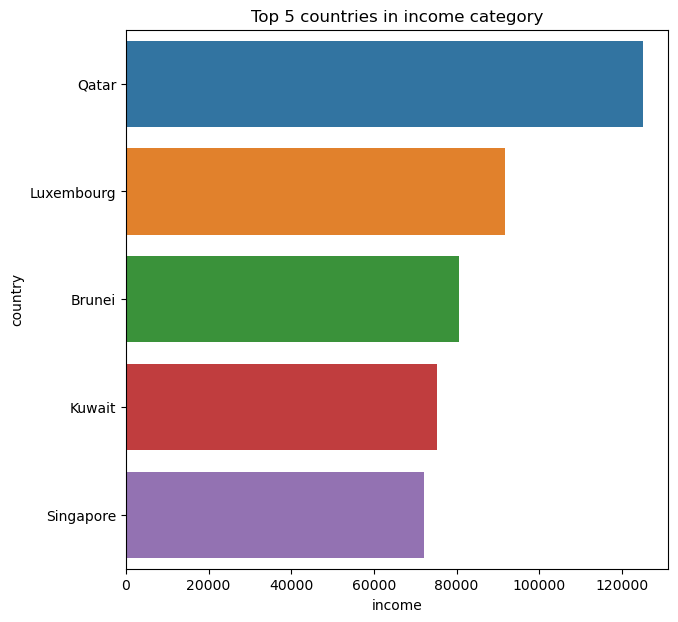

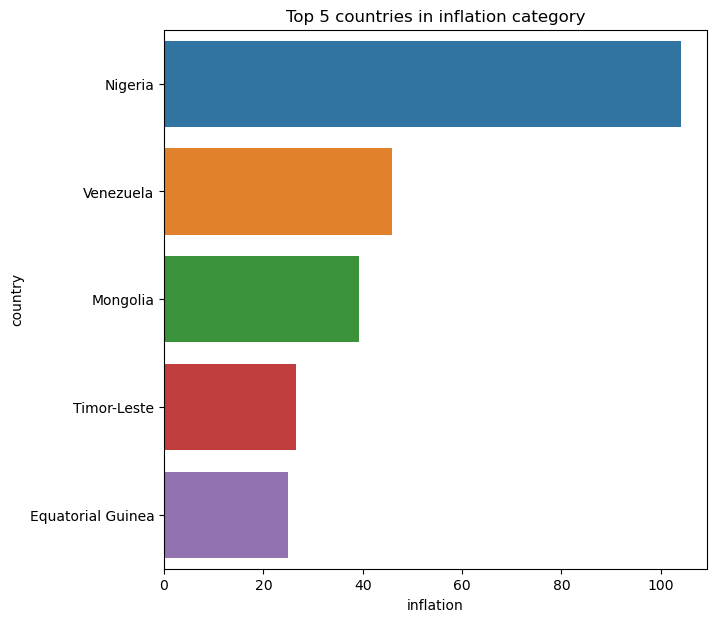

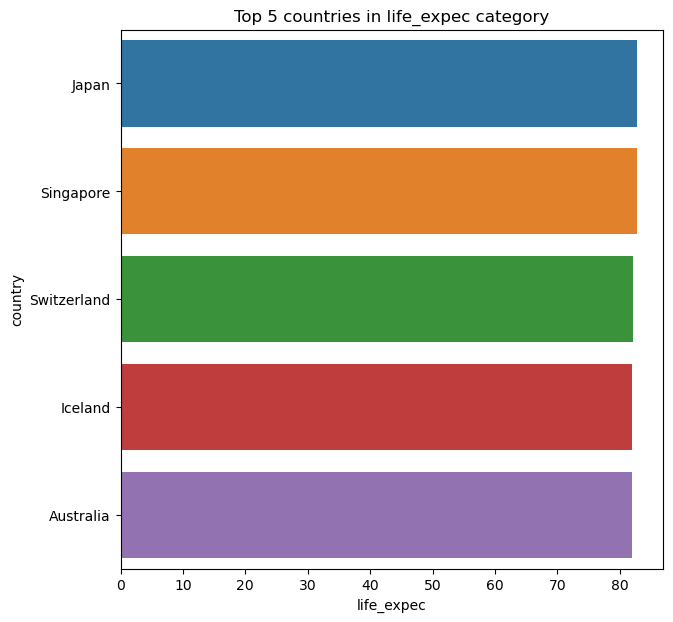

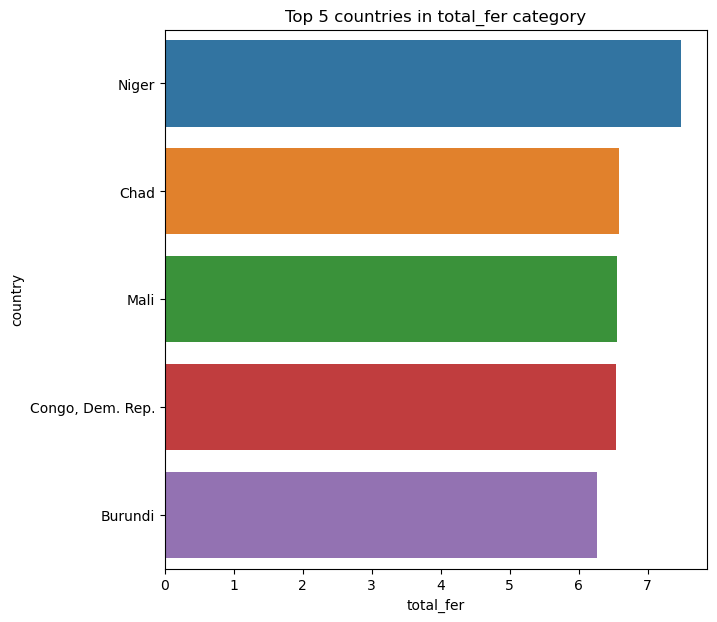

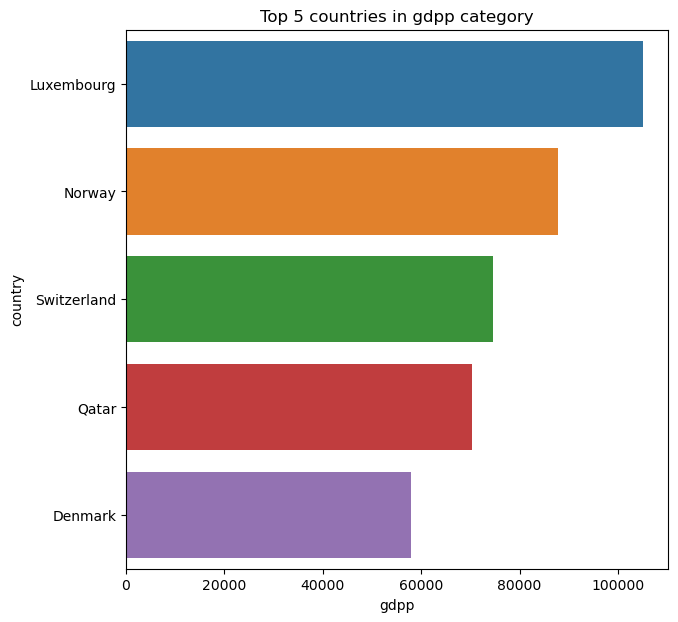

In [17]:
# Top 5 countries of each Category
for col in df.columns[1:]:
    get5(col)
    print('\n')

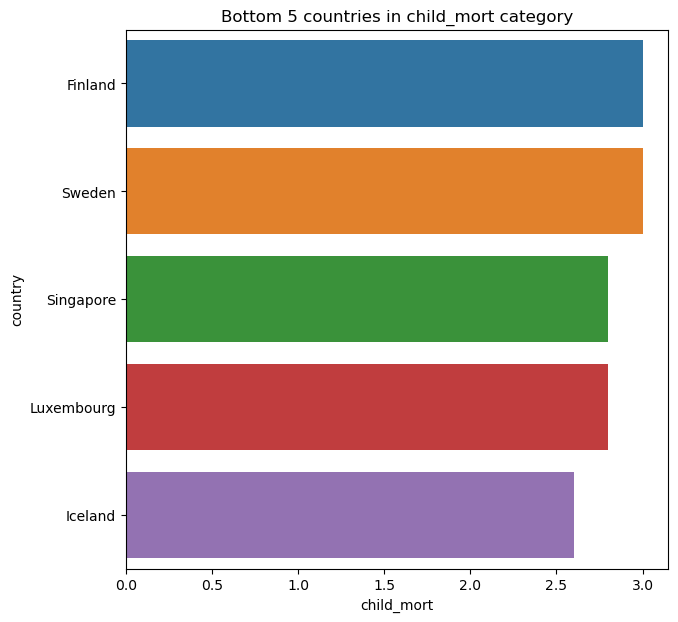

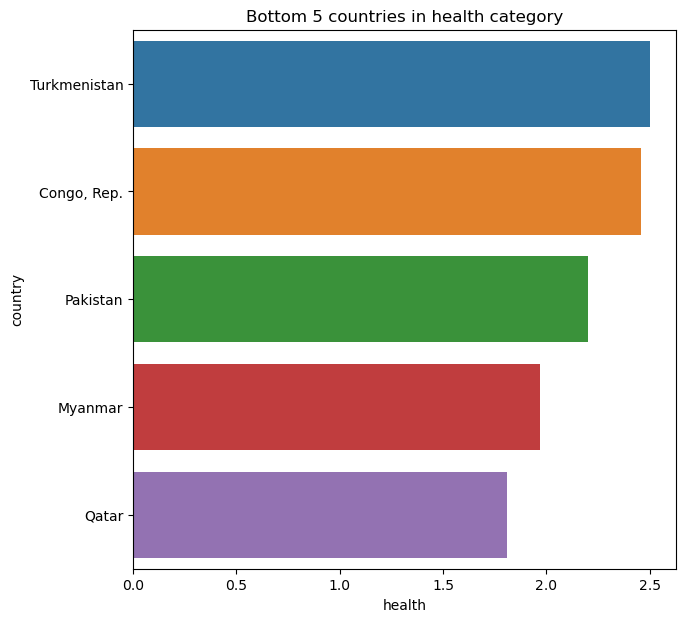

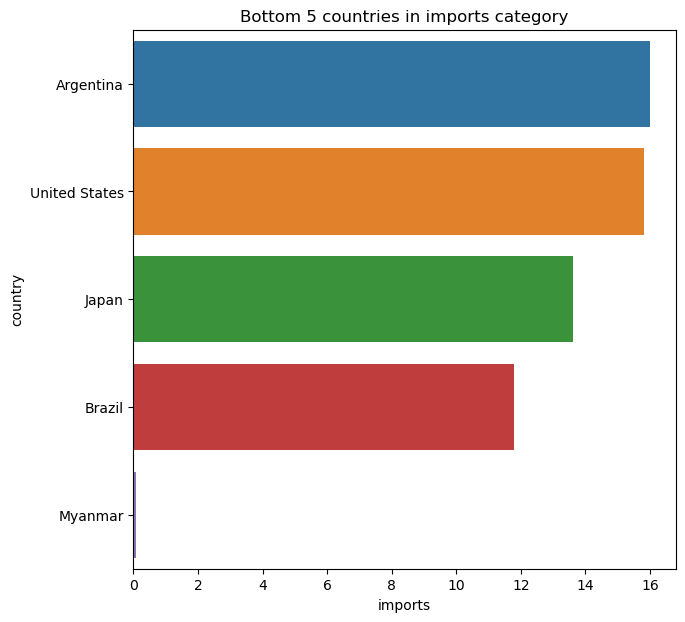

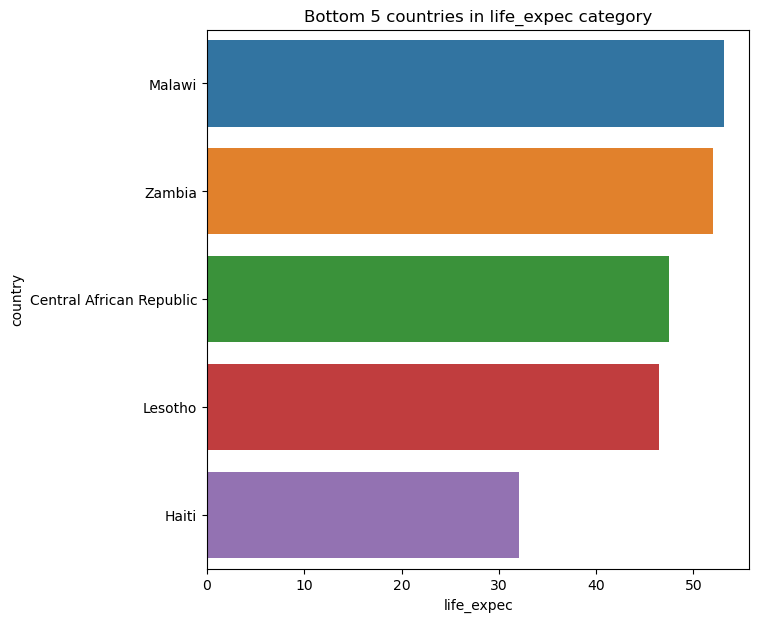

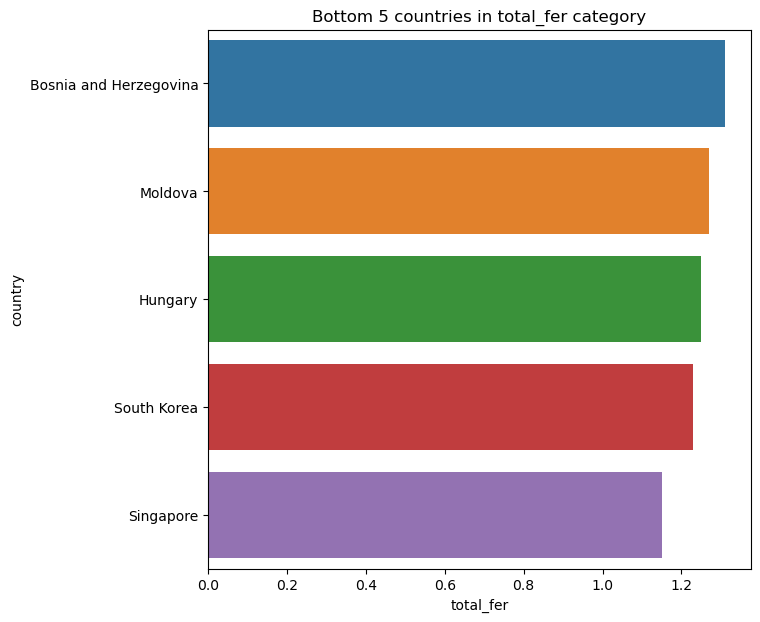

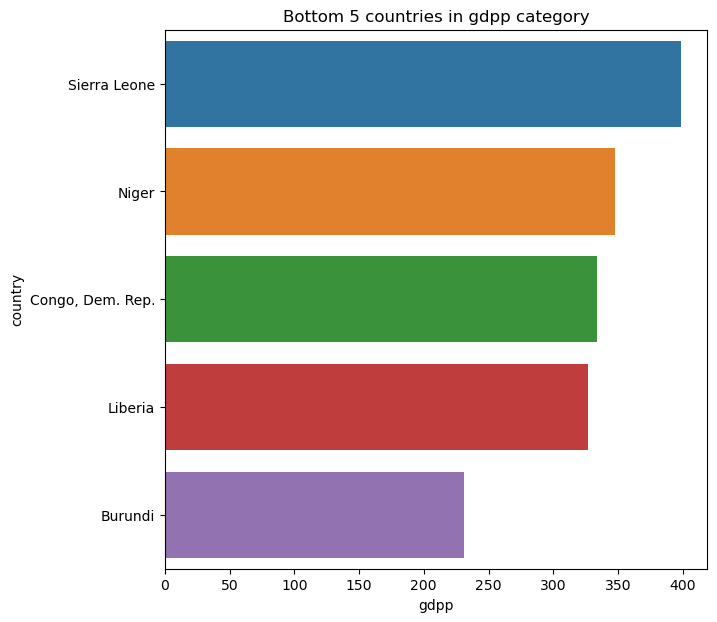

In [18]:
# Bottom 5 countries of each Category
for col in df.columns[1:]:
    get5(col,place='Bottom')
    print('\n')

 #### * child_mort : Economically backward nations have a high infant mortality rate!
-  Haiti has the highest children's deaths. African countries have significant positions in this statistic.
- At the other extreme of child_mort, countries from Asia and Europe has some solid presence.

#### * exports : It is a very important factor for building the nation's economy. Higher the exports of a nation, stronger the nation's economy and more is the wealth generated by the nation!
- exports of a nation are usually goods and services created domestically but sold to other nations. Goods and services exported depends on factors like the geographical location, natural resources, population size & their preference towards specific skills, etc.
- Despite Singapore's population size not being in the top 100, they have the highest number of exports. Luxembourg and Malta have probably followed the same route.
- Afghanistan and Nepal are present in the lower end of exports. Geographical locations of these nations have a heavy influence. Countries with lower exports also have small geographical area.

#### * health : Citizens of the developed nations have higher income and thus they don't have a problem on spending more on healthy lifestyle!
- US stands at the top when it comes to spending on health with 17% of the individual GDP contribution.
- 6% seems to be the mean values of the citizens spending on their health. Asian countries dominate the lower end of health with less than 3%. They are the most ignorant citizens when it comes to health.

#### * imports : It is another attribute that determines the reliance of the nations on other nations for the goods and services!
- imports stats of a nation describe the self reliance of a nation to solve their problems irrespective of being handicapped on one of the essential resources. Singapore, Malta, Luxembourg and Seychelles are present in the top 5 of exports as well as imports. This is just an indication that highlight the nation's strategies of probably capitalizing on their resources and creating solid exports that gets countered by the heavy imports on something else. This just balances the books! Brazil has the lowest imports out of all the nations with 11%. Sudan is the only African country present in this lower end list with 17%.

#### * income : Income of the per person is a key indicator about country's economic state. Higher the income of the citizens, more capabale they are to deal with uncertain situations!
- Citizens of the Qatar have the highest income out of all the countries with a difference of 30k more than the 2nd placed countries. Singapore and Luxembourg are again present in the top 5 of another feature. Lower end of the income is dominated by the African nations. This is influenced by the damage done by colonization out of which the nations have not yet recovered. The difference in the income of the nations in the top, middle and lower end is quite significant that will have an effect on every other features.

#### * inflation : It dictates the state of the economy, strength of the currency as well as demand for goods & services!
- Higher inflation reduces the purchasing power of the citizens. Countries present at the top end of inflation have a devastating economic situation. Having such high inflation is a risk to the existence of the nation.
- Similarly, the lower end of inflation has negative values i.e known as deflation. It signals a economy in a downward spiral leading to a recession or even a depression.

#### * life_expec : Higher life expectancy displays citizens with health attributes physically as well as mentally!
- life_expec depends alot on mental state as well as the lifestyle adopted by the citizens. Singapore is again present in the top of 5 of a feature.
- one of the countries with a high life_expec are present in the top 5 of health that is related to the spending done by the citizen on health.
- African countries are again present in the lower end for another feature.

#### * total_fer : Economically backward countries have a high fertility rate!
- African countries dominate the total_fer with values 6+. Mean total_fer value is 2 whereas lower end values of 1 concern abit as well.

#### * gdpp : It is a feature that provides information about the contribution of a citizen to it's GDP!
- It is a tricky feature as the population of the nation is a significant factor. One clear cut example of this is China. It has a huge population alongwith huge GDP.
- Luxembourg is again present in the top ranks. Switzerland and Qatar are present in the top 5 similar to income.
- Lower end is again dominated by African nations that labels them as the economically backward.

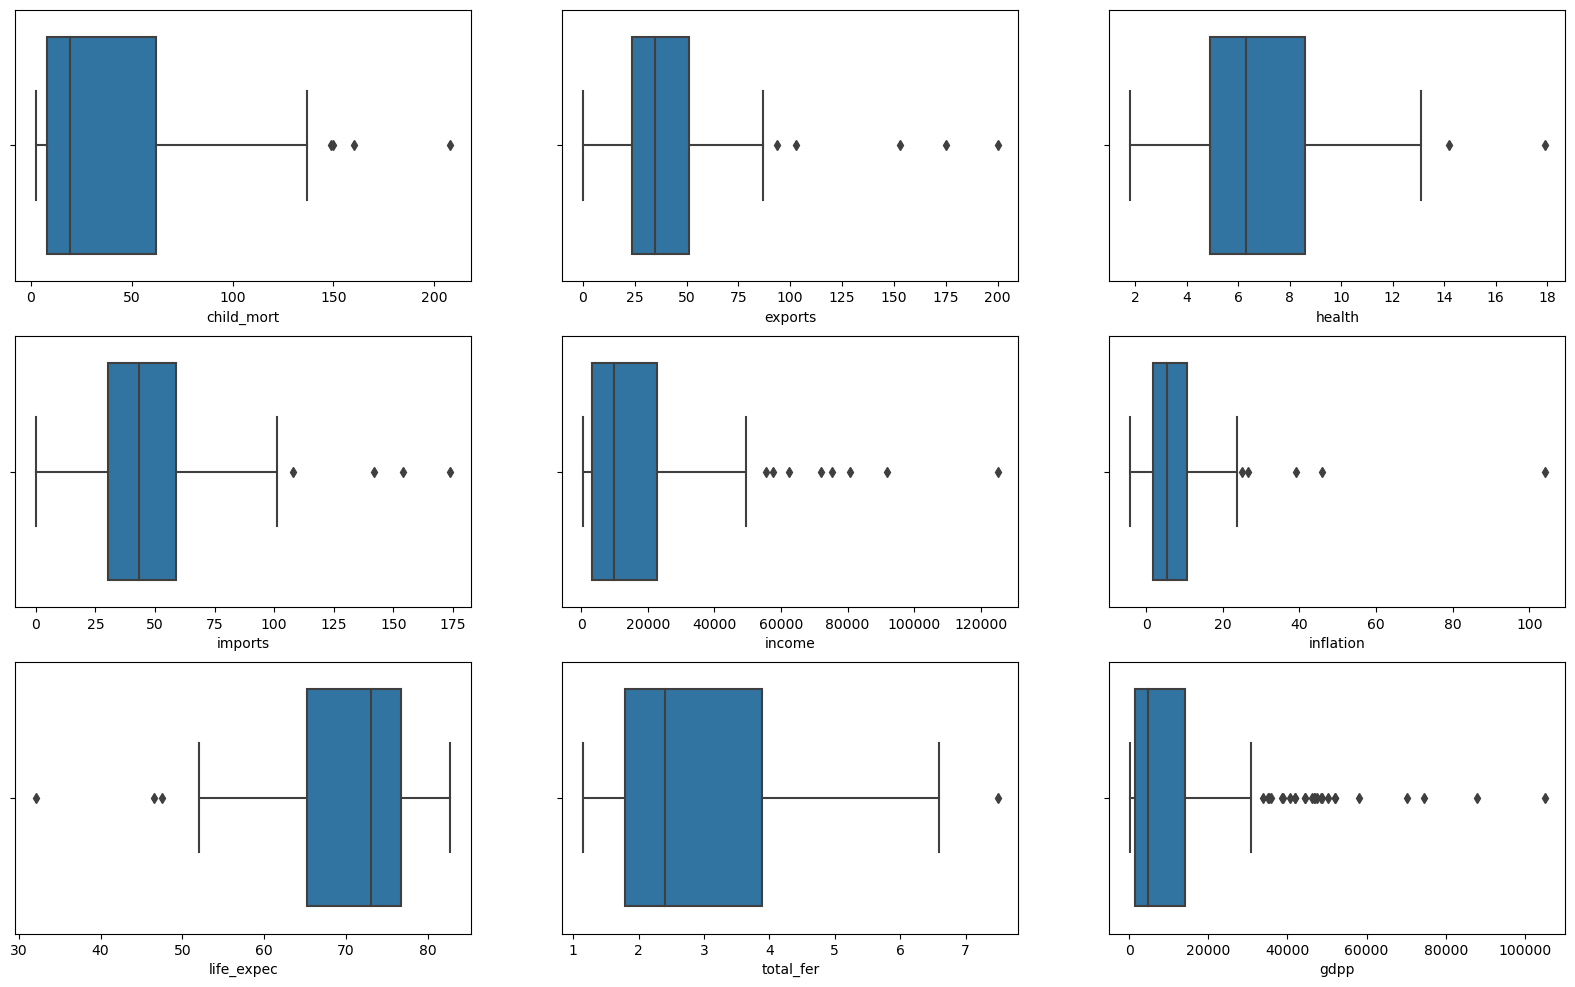

In [19]:
plt.figure(figsize=(20, 12))
plt.subplot(3,3,1)
sns.boxplot(df.child_mort)
plt.subplot(3,3,2)
sns.boxplot(df.exports)
plt.subplot(3,3,3)
sns.boxplot(df.health)
plt.subplot(3,3,4)
sns.boxplot(df.imports)
plt.subplot(3,3,5)
sns.boxplot(df.income)
plt.subplot(3,3,6)
sns.boxplot(df.inflation)
plt.subplot(3,3,7)
sns.boxplot(df.life_expec)
plt.subplot(3,3,8)
sns.boxplot(df.total_fer)
plt.subplot(3,3,9)
sns.boxplot(df.gdpp)
plt.show()

- From the visualizations and the list of features of an economically backward nations, a host of insights can be gained!
- When it comes to health conditions, African countries hold higher ranks in all the wrong situations. They hold a significant presence in high child_mort, low life_expec and high total_fer.
- All these problems are already pretty serious and hence it is very important to assist them during the periods of unforseen turmoils. Despite such numbers, Haiti grabs the top spot with high values of child_mort. Asian and European countries are present at the other end of it.
- US citizens are the highest spenders on their health however they are not present in the top 5 ranks of life_expec & total_fer. None of the countries with a high life_expec are present in the top 5 of health. Asian countries crowd lower end of health.
- Singapore, Malta, Luxembourg & Seychelles are present in the top 5 of exports as well as imports. Population size and geographical locations play a pivotal role when it comes to imports and exports.
- Sudan is the only African nation with low imports and Brazil has the lowest imports out of all.
- African countries display very high values of inflation whereas countries from all the continents can be found with low inflation values.
- Citizens of the Qatar are the highest paid with Singapore and Luxembourg again grabbing spots in top 5 of income.
- For gdpp, Luxembourg is in the top ranks. Switzerland and Qatar are present in the top 5 similar to income.
- African nations are present in the lower end of income as well as gdpp. Colonization has had a huge toll on the African nations.

<a id="modeling"></a>
# 5️⃣ ㅣCorrelation

<AxesSubplot:>

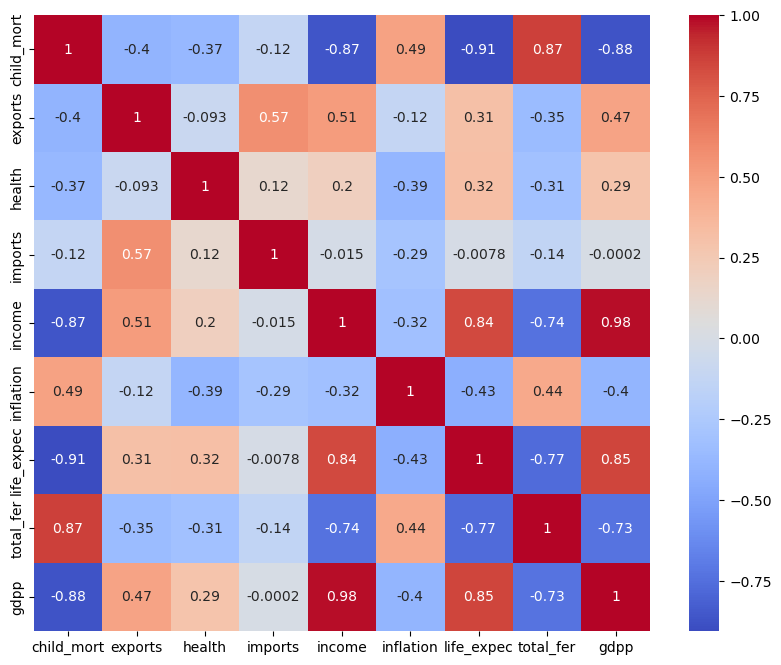

In [20]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(method='spearman'), square=True, cmap='coolwarm', annot=True)

- exports is highly correlated with imports and income.
- health, exports, income are highly correlated with gdpp.
- child_mort is having high negative correlation with life_expec.
- total_fer is highly positively correlated with child_mort and negatively correlated with life_expec

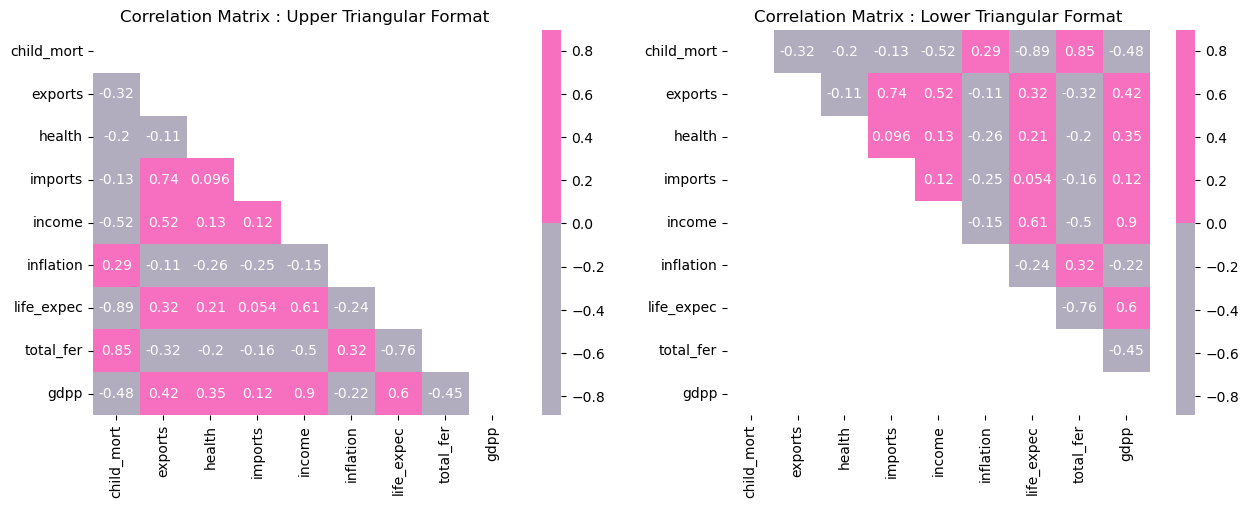

In [21]:
colors = ['#12053b53','#f76fbf']
ut = np.triu(df.corr())
lt = np.tril(df.corr())

fig,ax = plt.subplots(nrows = 1, ncols = 2,figsize = (15,5))
plt.subplot(1,2,1)
sns.heatmap(df.corr(),cmap = colors,annot = True,cbar = 'True',mask = ut);
plt.title('Correlation Matrix : Upper Triangular Format');

plt.subplot(1,2,2)
sns.heatmap(df.corr(),cmap = colors,annot = True,cbar = 'True',mask = lt);
plt.title('Correlation Matrix : Lower Triangular Format');

- Many features have relationships with each other.
- child_mort clearly increases when income, gdpp and exports decreases. Rise in inflation also leads to high child_mort cases. Economic conditions unfortunately act as an important factor!
- Rise in exports clearly increases gdpp, income and imports.
- Spending on health has a small rise in life_expec and also decreases the child_mort.
- income and gdpp display a very high 0.9 correlation value. From the health perspective, high income has lead to higher life_expec but decreases the total_fer by some significant margin.
- As expected high inflation has a negative effect on the financial features. High inflation displays a high total_fer and child_mort. This describes the typical features of a backward nation.
- According to the data, higher life_expec displays a low total_fer. Higher gdpp has lead more spending on health.
#### We can clearly see that some features are essentially from the same category and they have the same reaction to other features of different category.


#### The 3 categories of the features are :
- Health : child_mort, health, life_expec, total_fer
- Trade : imports, exports
- Finance : income, inflation, gdpp

<AxesSubplot:xlabel='imports', ylabel='exports'>

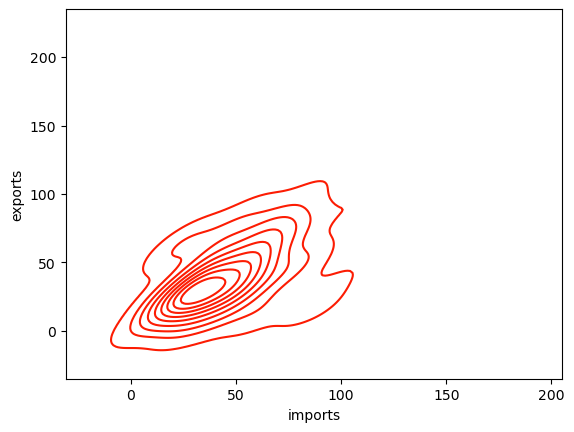

In [22]:
sns.kdeplot(data=df, x=df['imports'], y=df['exports'], color='#fc1c03')

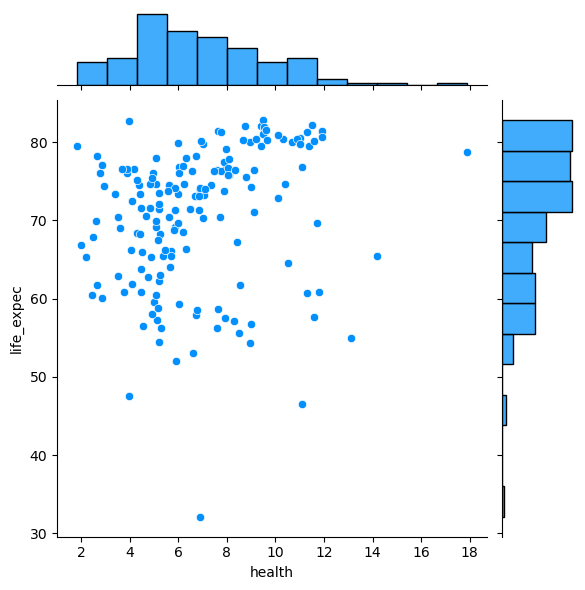

In [23]:
sns.jointplot(data=df, x=df['health'], y=df['life_expec'], color='#0390fc')

Text(0.5, 0, 'countries')

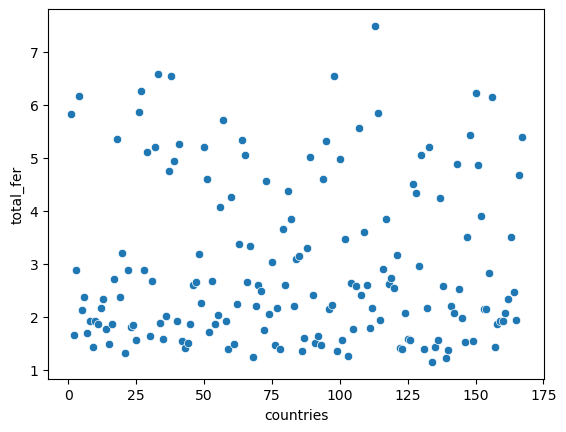

In [24]:
sns.scatterplot(data=df, x=range(1, len(df)+1), y=df['total_fer'])
plt.xlabel('countries')

<AxesSubplot:xlabel='income', ylabel='total_fer'>

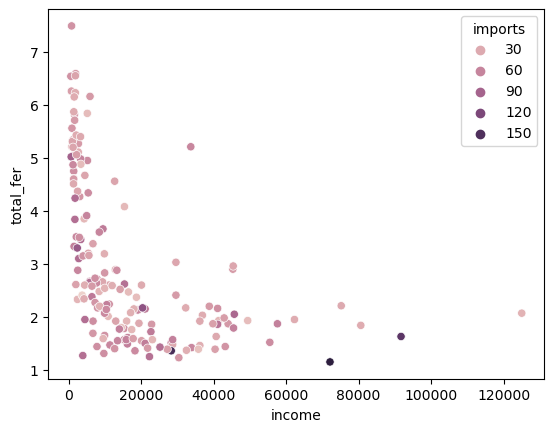

In [25]:
sns.scatterplot(data=df, x=df['income'], y=df['total_fer'], hue='imports')

In [26]:
# GDP per country
fig = px.choropleth(df,
                    locationmode='country names',
                    locations='country',
                    color='gdpp',
                    title='Coutries by gdpp'
                   )
fig.show()

In [27]:
# Death of children under 5 years of age per 1000 live births
fig = px.choropleth(df,
                    locationmode='country names',
                    locations='country',
                    color='child_mort',
                    title='Coutries by child_mort'
                   )
fig.show()

In [28]:
# Net income per person
fig = px.choropleth(df,
                    locationmode='country names',
                    locations='country',
                    color='income',
                    title='Coutries by income'
                   )
fig.show()

In [29]:
#Exports of goods and services per capita
fig = px.choropleth(df,
                    locationmode='country names',
                    locations='country',
                    color='exports',
                    title='Coutries by exports'
                   )
fig.show()

In [30]:
#Imports of goods and services per capita
fig = px.choropleth(df,
                    locationmode='country names',
                    locations='country',
                    color='imports',
                    title='Coutries by imports'
                   )
fig.show()

In [31]:
#Total health spending per capita
fig = px.choropleth(df,
                    locationmode='country names',
                    locations='country',
                    color='health',
                    title='Coutries by health'
                   )
fig.show()

In [32]:
#inflation
fig = px.choropleth(df,
                    locationmode='country names',
                    locations='country',
                    color='inflation',
                    title='Coutries by inflation'
                   )
fig.show()

<a id="summary"></a>
# 6️⃣ㅣ Model Building

### 1.  Standardrizing data

In [33]:
df2= df.drop(columns = ['country'])
# instantiating the scaler
scaler = StandardScaler()

# fit and transform
df_scale = scaler.fit_transform(df2)
df_scale.shape

(167, 9)

In [34]:
df_scale1 = pd.DataFrame(df_scale)
df_scale1.columns = ['child_mort', 'exports', 'health', 'imports', 'income','inflation', 'life_expec', 'total_fer', 'gdpp']
df_scale1.head()

child_mort   exports    health   imports    income  inflation  life_expec  \
0    1.291532 -1.138280  0.279088 -0.082455 -0.808245   0.157336   -1.619092   
1   -0.538949 -0.479658 -0.097016  0.070837 -0.375369  -0.312347    0.647866   
2   -0.272833 -0.099122 -0.966073 -0.641762 -0.220844   0.789274    0.670423   
3    2.007808  0.775381 -1.448071 -0.165315 -0.585043   1.387054   -1.179234   
4   -0.695634  0.160668 -0.286894  0.497568  0.101732  -0.601749    0.704258   

   total_fer      gdpp  
0   1.902882 -0.679180  
1  -0.859973 -0.485623  
2  -0.038404 -0.465376  
3   2.128151 -0.516268  
4  -0.541946 -0.041817

### 2.Principal componenet Analysis (PCA)

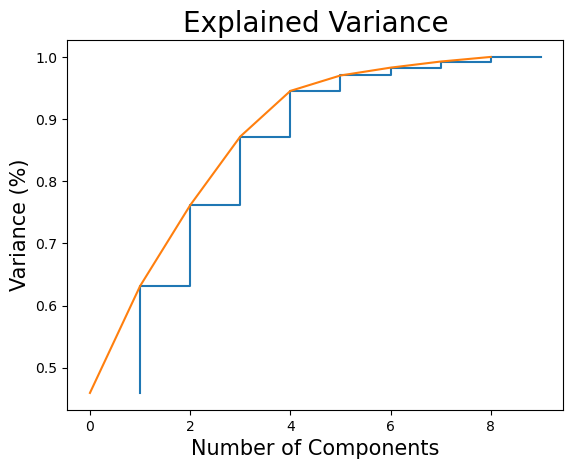

In [35]:
# pass through the scaled data set into our PCA class object
pca = PCA().fit(df_scale)

# plot the Cumulative Summation of the Explained Variance
plt.step(list(range(1,10)), np.cumsum(pca.explained_variance_ratio_))
plt.plot(np.cumsum(pca.explained_variance_ratio_))

# define the labels & title
plt.xlabel('Number of Components', fontsize = 15)
plt.ylabel('Variance (%)', fontsize = 15) 
plt.title('Explained Variance', fontsize = 20)

# show the plot
plt.show()

In [36]:
#Lets check if we will take 9 component then how much varience it explain. Ideally it should be 1 i.e 100%
sum(pca.explained_variance_ratio_)

1.0

In [37]:
var_ratio={}
for n in range(2,10):
    pca=PCA(n_components=n)
    pca_components = pca.fit(df_scale)
    var_ratio[n]=sum(pca.explained_variance_ratio_)

In [38]:
var_ratio

{2: 0.631333654377141,
 3: 0.7613762433466716,
 4: 0.871907861402391,
 5: 0.9453099756439514,
 6: 0.9701523224082288,
 7: 0.982756626389879,
 8: 0.9925694437691406,
 9: 1.0}

#### Typically eigen values with more than 90% of ratio of variance are selected. We then use 5 as n_component parameter and save the PCA dataset into a new object called country_pca, this dataset will be used to preform the final clustering.

In [39]:
# we will choose 5 pca components and create a new dataset

final_pca = PCA(n_components=5).fit(df_scale)
reduced_cr=final_pca.fit_transform(df_scale)
# store it in a new data frame
country_pca= pd.DataFrame(data = reduced_cr, columns = ['principal component 1', 'principal component 2',
                                                        'principal component 3','principal component 4',
                                                        'principal component 5'])

country_pca.head()

principal component 1  principal component 2  principal component 3  \
0              -2.913025               0.095621              -0.718118   
1               0.429911              -0.588156              -0.333486   
2              -0.285225              -0.455174               1.221505   
3              -2.932423               1.695555               1.525044   
4               1.033576               0.136659              -0.225721   

   principal component 4  principal component 5  
0               1.005255              -0.158310  
1              -1.161059               0.174677  
2              -0.868115               0.156475  
3               0.839625              -0.273209  
4              -0.847063              -0.193007

In [40]:
col_list=df2.columns
col_list

Index(['child_mort', 'exports', 'health', 'imports', 'income', 'inflation',
       'life_expec', 'total_fer', 'gdpp'],
      dtype='object')

In [41]:
pd.DataFrame(final_pca.components_.T, columns=['PC_' +str(i) for i in range(5)],index=col_list)

PC_0      PC_1      PC_2      PC_3      PC_4
child_mort -0.419519  0.192884 -0.029544  0.370653 -0.168970
exports     0.283897  0.613163  0.144761  0.003091  0.057616
health      0.150838 -0.243087 -0.596632  0.461897  0.518000
imports     0.161482  0.671821 -0.299927 -0.071907  0.255376
income      0.398441  0.022536  0.301548  0.392159 -0.247150
inflation  -0.193173 -0.008404  0.642520  0.150442  0.714869
life_expec  0.425839 -0.222707  0.113919 -0.203797  0.108220
total_fer  -0.403729  0.155233  0.019549  0.378304 -0.135262
gdpp        0.392645 -0.046022  0.122977  0.531995 -0.180167

In [42]:
# Factor Analysis : variance explained by each component- 
pd.Series(final_pca.explained_variance_ratio_,index=['PC_'+ str(i) for i in range(5)])

PC_0    0.459517
PC_1    0.171816
PC_2    0.130043
PC_3    0.110532
PC_4    0.073402
dtype: float64

### 3. K-Means Algorithm

In [43]:
# define a dictionary that contains all of our relevant info.
results = []

# define how many clusters we want to test up to.
num_of_clusters = 10

# run through each instance of K
for k in range(2, num_of_clusters):
    
    print("-"*100)
    
    # create an instance of the model, and fit the training data to it.
    kmeans = KMeans(n_clusters=k, random_state=0).fit(country_pca)
    
      
    results.append(kmeans.inertia_)
    
    # print the results    
    print("Number of Clusters: {}".format(k),kmeans.inertia_)

----------------------------------------------------------------------------------------------------
Number of Clusters: 2 968.4663525507153
----------------------------------------------------------------------------------------------------
Number of Clusters: 3 749.6189390258896
----------------------------------------------------------------------------------------------------
Number of Clusters: 4 618.8958865727377
----------------------------------------------------------------------------------------------------
Number of Clusters: 5 539.2980221249546
----------------------------------------------------------------------------------------------------
Number of Clusters: 6 469.9949500273203
----------------------------------------------------------------------------------------------------
Number of Clusters: 7 424.16270068106707
----------------------------------------------------------------------------------------------------
Number of Clusters: 8 385.8974920041872
------------

#### 3.1 Elbow Method

In [44]:
kmeans_set={"init":"random","n_init":10,"max_iter":300,"random_state":42}

In [45]:
cluster_range = range( 2, 10 )
cluster_errors=[]
for k in cluster_range:
    kmeans= KMeans(n_clusters=k, **kmeans_set) #** open dictionry
    kmeans.fit(country_pca)
    cluster_errors.append( kmeans.inertia_) 

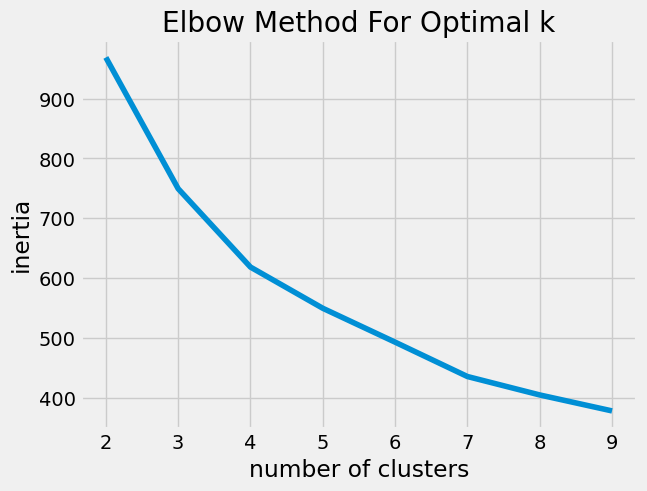

In [46]:
plt.style.use("fivethirtyeight")
plt.plot(range(2,10),cluster_errors)
plt.xticks(range(2,10))
plt.title('Elbow Method For Optimal k')
plt.xlabel('number of clusters')
plt.ylabel('inertia')
plt.show()

In [47]:
# Now we are going to implement Elbow method to final optimal number of clusters
k1=KneeLocator(range(2,10),cluster_errors , curve='convex', direction= 'decreasing')
k1.elbow

4

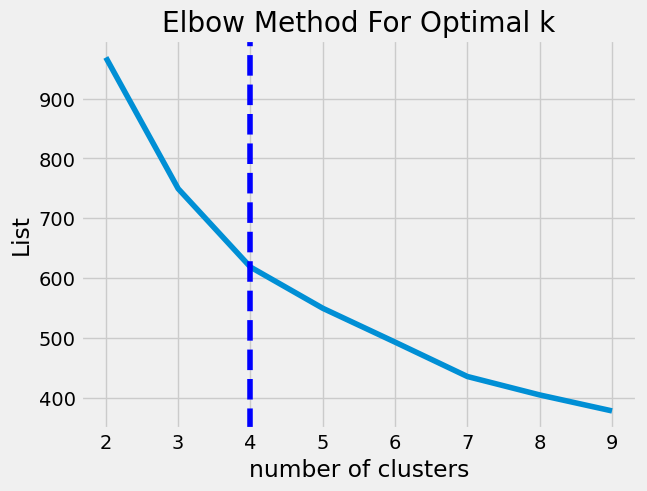

In [48]:
plt.style.use("fivethirtyeight")
plt.plot(range(2,10),cluster_errors)
plt.xticks(range(2,10))
plt.xlabel('number of clusters')
plt.ylabel('List')
plt.title('Elbow Method For Optimal k')
plt.axvline(x=k1.elbow, color='b', label= 'axvline-full height', ls= '--')
plt.show()

- elbow method: k=4  

#### 3.2 Silhouette Coefficient Method:

In [49]:
#let's try silhouette_score for k=4,3

# Instantiate the KMeans for 4 clusters
km = KMeans(n_clusters=4, random_state=42)
# Fit the KMeans model
km.fit_predict(country_pca)
# Calculate Silhoutte Score
score = silhouette_score(country_pca, km.labels_, metric='euclidean')
# Print the score
print('Silhouetter Average Score: %.3f' % score)

Silhouetter Average Score: 0.326


In [50]:

# Instantiate the KMeans for 3 clusters
km = KMeans(n_clusters=3, random_state=42)
# Fit the KMeans model
km.fit_predict(country_pca)
# Calculate Silhoutte Score
score = silhouette_score(country_pca, km.labels_, metric='euclidean')
# Print the score
print('Silhouetter Average Score: %.3f' % score)

Silhouetter Average Score: 0.308


In [51]:
silhouette_coefficients =[]
for k in range(2,10):#1 is the worse
    kmeans=KMeans(n_clusters=k, **kmeans_set)
    kmeans.fit(country_pca)
    score= silhouette_score(country_pca, kmeans.labels_)
    silhouette_coefficients.append(score)

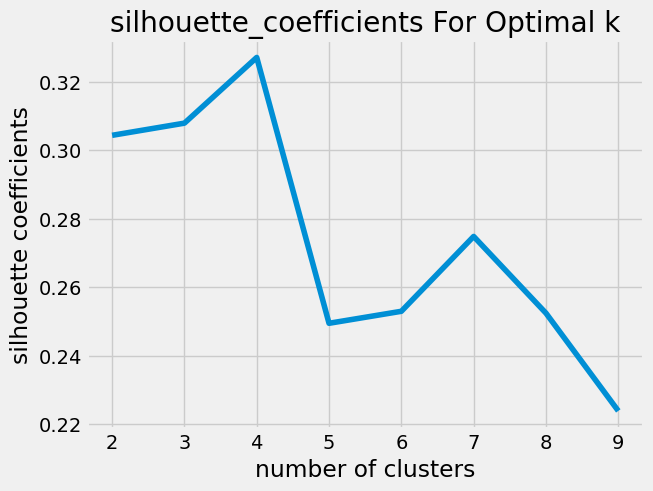

In [52]:
plt.style.use("fivethirtyeight")
plt.plot(range(2,10),silhouette_coefficients)
plt.xticks(range(2,10))
plt.xlabel('number of clusters')
plt.ylabel('silhouette coefficients')
plt.title('silhouette_coefficients For Optimal k')
plt.show()

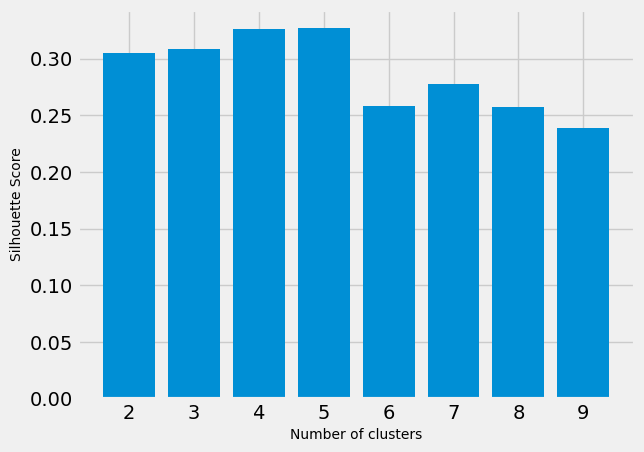

In [53]:
silhouette_scores = []

for n_cluster in range(2, 10):
    silhouette_scores.append( 
        silhouette_score(country_pca, KMeans(n_clusters = n_cluster).fit_predict(country_pca))) 
    
# Plotting a bar graph to compare the results 
k = [2, 3, 4, 5, 6,7,8,9] 

plt.bar(k, silhouette_scores) 
plt.xlabel('Number of clusters', fontsize = 10) 
plt.ylabel('Silhouette Score', fontsize = 10) 
plt.show()
#confirming number of clusters

#### the best silhouette_score k=3

----------------------------------------------------------------------------------------------------


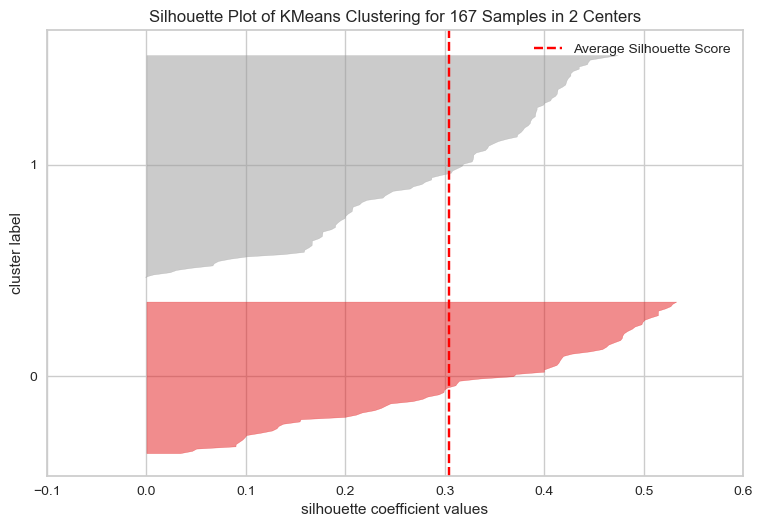

----------------------------------------------------------------------------------------------------


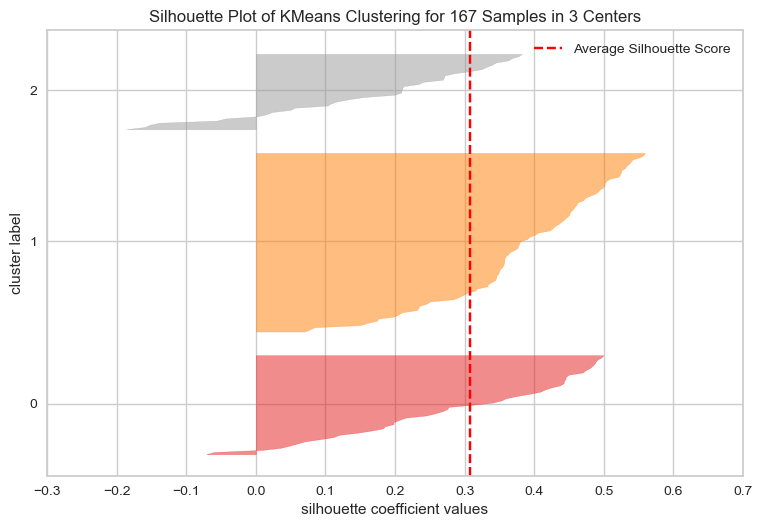

----------------------------------------------------------------------------------------------------


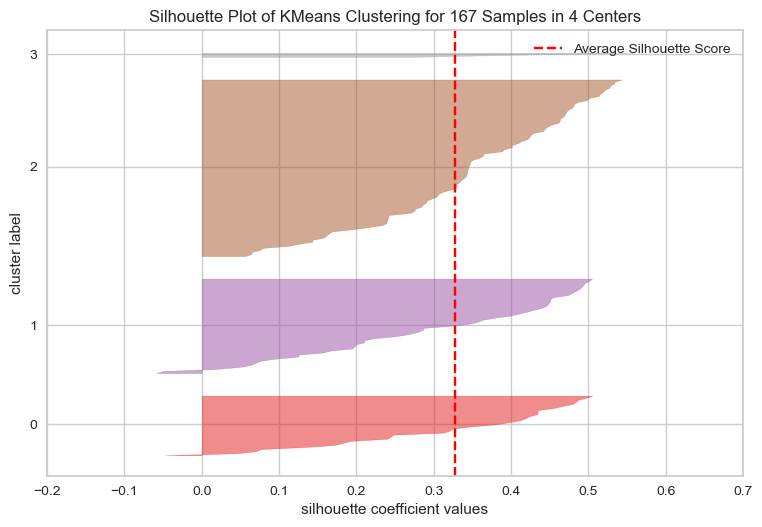

----------------------------------------------------------------------------------------------------


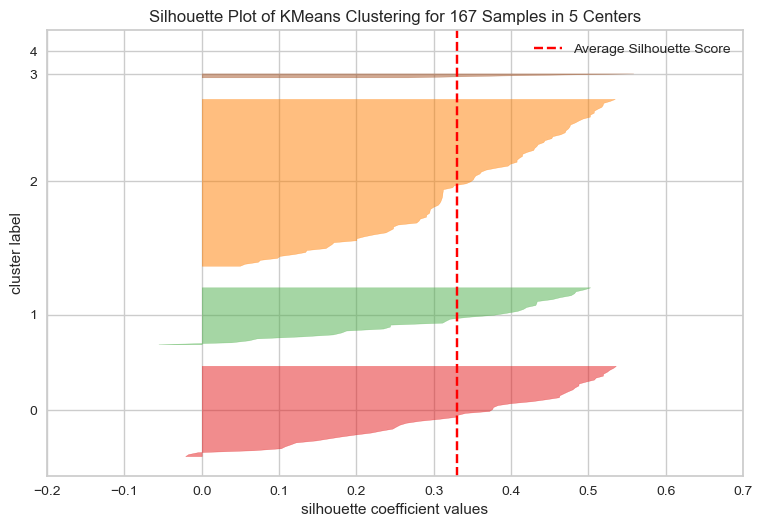

In [54]:
# From the graph above, it indicates that we should choose k = 4

from yellowbrick.cluster import SilhouetteVisualizer


clusters = [2,3,4,5]

for cluster in clusters:
    
    print('-'*100)

    # define the model for K
    kmeans = KMeans(n_clusters = cluster, random_state=0)

    # pass the model through the visualizer
    visualizer = SilhouetteVisualizer(kmeans)

    # fit the data
    visualizer.fit(country_pca)

    # show the chart
    visualizer.poof()

    
# the silhouette plot also shows that the optimal k is 3

- Even though K = 4 has the highest silhouette score, we can see from the diagram that one of the cluster is smaller than the rest. Meanwhile K = 3 , has similar sizes for all their clusters.

- So based on the elbow method and silhouette score  we try to build the model with 4 clusters for k-mean modeling

In [55]:
df_kmeans_4=df.copy()

In [56]:
# Kmeans with 4 clusters
kmeans_4 = KMeans(n_clusters=4, random_state=0).fit(country_pca)
df_kmeans_4['cluster'] = kmeans_4.labels_
df_kmeans_4.head()

country  child_mort  exports  health  imports  income  \
0          Afghanistan        90.2     10.0    7.58     44.9    1610   
1              Albania        16.6     28.0    6.55     48.6    9930   
2              Algeria        27.3     38.4    4.17     31.4   12900   
3               Angola       119.0     62.3    2.85     42.9    5900   
4  Antigua and Barbuda        10.3     45.5    6.03     58.9   19100   

   inflation  life_expec  total_fer   gdpp  cluster  
0       9.44        56.2       5.82    553        1  
1       4.49        76.3       1.65   4090        2  
2      16.10        76.5       2.89   4460        2  
3      22.40        60.1       6.16   3530        1  
4       1.44        76.8       2.13  12200        2

In [57]:
df_kmeans_4['cluster'].value_counts()

2    87
1    47
0    30
3     3
Name: cluster, dtype: int64

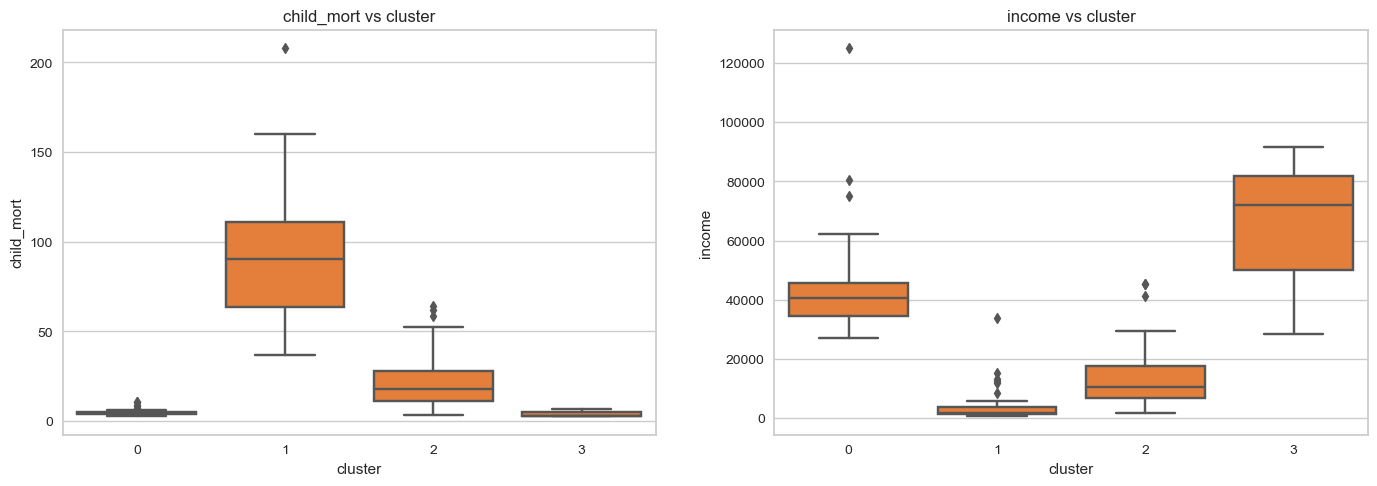

In [58]:
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (15,5))

plt.subplot(1,2,1)
sns.boxplot(x = 'cluster', y = 'child_mort', data  = df_kmeans_4, color = '#FF781F');
plt.title('child_mort vs cluster')

plt.subplot(1,2,2)
sns.boxplot(x = 'cluster', y = 'income', data  = df_kmeans_4, color = '#FF781F');
plt.title('income vs cluster')

plt.show()

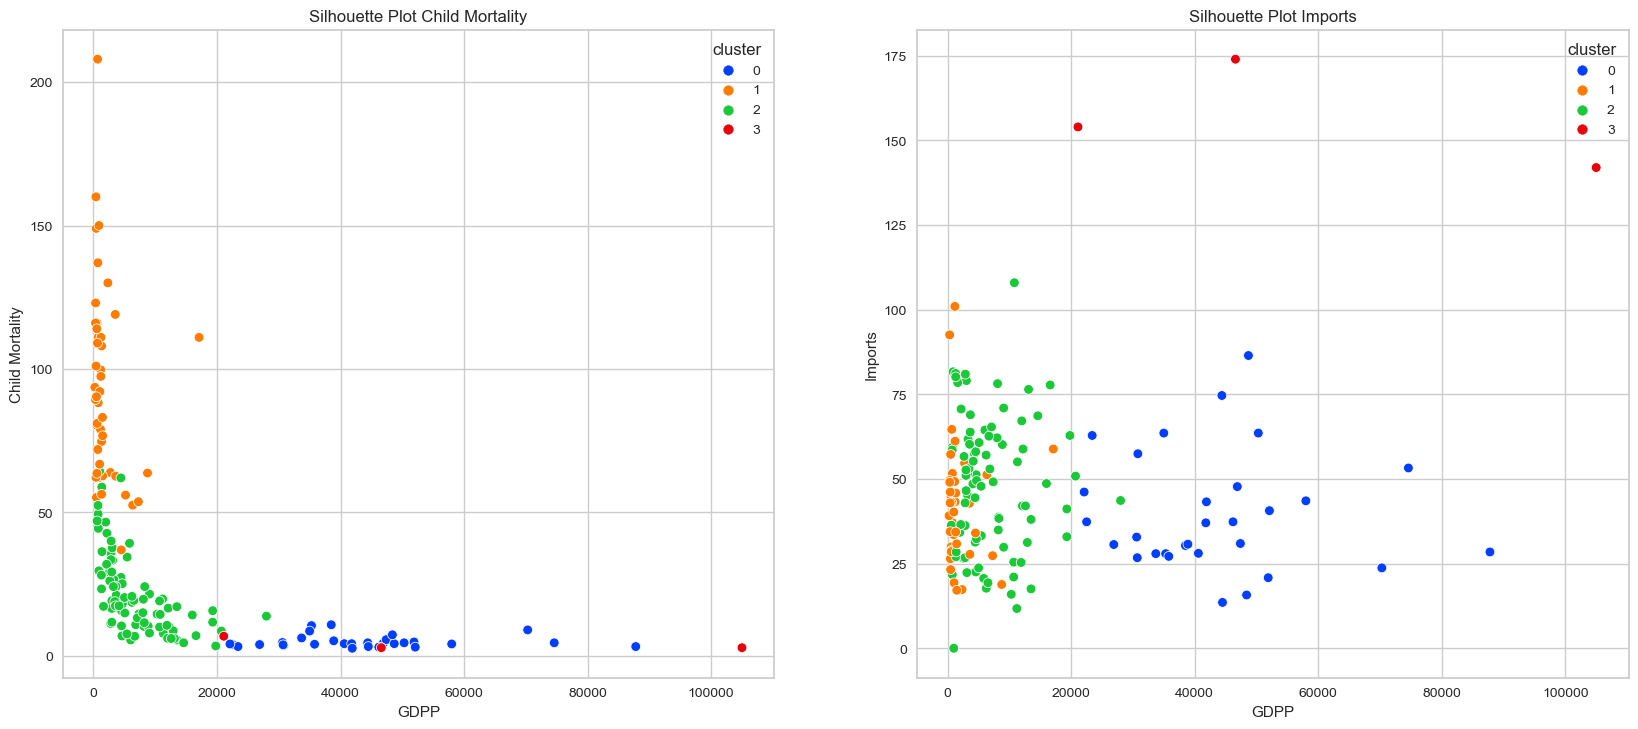

In [59]:
plt.figure(figsize = (18,8))
plt.subplot(1, 2, 1)
sns.scatterplot(x = 'gdpp', y = 'child_mort', data =df_kmeans_4, hue = 'cluster', palette = 'bright')
plt.title('Silhouette Plot Child Mortality')
plt.xlabel('GDPP')
plt.ylabel('Child Mortality')
plt.subplot(1, 2, 2)
sns.scatterplot(x = 'gdpp', y = 'imports', data = df_kmeans_4, hue = 'cluster', palette = 'bright')
plt.title('Silhouette Plot Imports')
plt.xlabel('GDPP')
plt.ylabel('Imports')
plt.show()

- Based on the above plot, it was observed that the k=4 model could not cluster well.Therefore, we build the model again with 3 clusters. 

In [60]:
df_kmeans_3=df.copy()

In [61]:
# Kmeans with 3 clusters
kmeans_3 = KMeans(n_clusters=3, random_state=0).fit(country_pca) # fit model with country_pca data
df_kmeans_3['cluster'] = kmeans_3.labels_
df_kmeans_3.head()

country  child_mort  exports  health  imports  income  \
0          Afghanistan        90.2     10.0    7.58     44.9    1610   
1              Albania        16.6     28.0    6.55     48.6    9930   
2              Algeria        27.3     38.4    4.17     31.4   12900   
3               Angola       119.0     62.3    2.85     42.9    5900   
4  Antigua and Barbuda        10.3     45.5    6.03     58.9   19100   

   inflation  life_expec  total_fer   gdpp  cluster  
0       9.44        56.2       5.82    553        0  
1       4.49        76.3       1.65   4090        1  
2      16.10        76.5       2.89   4460        1  
3      22.40        60.1       6.16   3530        0  
4       1.44        76.8       2.13  12200        1

In [62]:
df_kmeans_3['cluster'].value_counts()

1    84
0    47
2    36
Name: cluster, dtype: int64

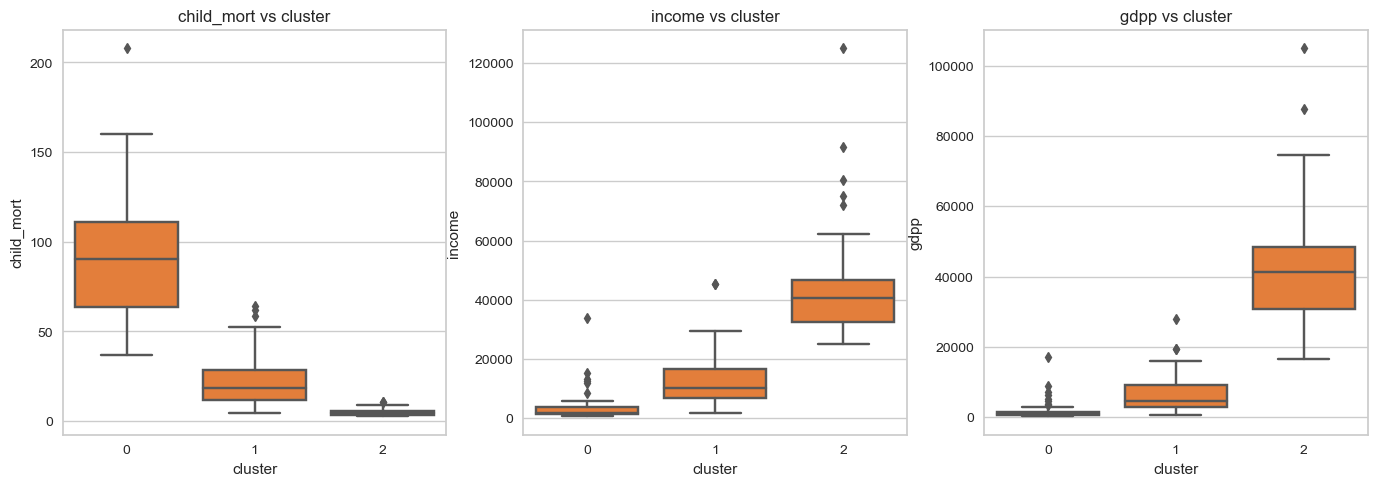

In [63]:
fig, ax = plt.subplots(nrows = 1, ncols = 3, figsize = (15,5))

plt.subplot(1,3,1)
sns.boxplot(x = 'cluster', y = 'child_mort', data  = df_kmeans_3, color = '#FF781F');
plt.title('child_mort vs cluster')

plt.subplot(1,3,2)
sns.boxplot(x = 'cluster', y = 'income', data  = df_kmeans_3, color = '#FF781F');
plt.title('income vs cluster')

plt.subplot(1,3,3)
sns.boxplot(x = 'cluster', y = 'gdpp', data  = df_kmeans_3, color = '#FF781F');
plt.title('gdpp vs cluster')
plt.show()

- Countries with low gdpp,income and high child mortality are Under-developed countries (cluster = 0)
- Countries with medium gdpp,income and child mortality are Developing countries (cluster = 1)
- Countries with high gdpp,income and low child mortality are Developed countries (cluster= 2)

- From the above plot we can conclude :
   - 0 : Help Needed
   - 1 : Might Need Help
   - 2 : No Help Needed

In [64]:
#Cluster profiling is based on major three factors:1-Child Mortality 2- Income 3-gdpp
#Creating a new dataframe for these variable along with the cluster 
df_cluster = df_kmeans_3[['child_mort','income','gdpp','cluster']]
df_cluster = df_cluster.groupby('cluster').mean()
df_cluster

child_mort        income          gdpp
cluster                                        
0         92.961702   3942.404255   1922.382979
1         21.927381  12305.595238   6486.452381
2          5.000000  45672.222222  42494.444444

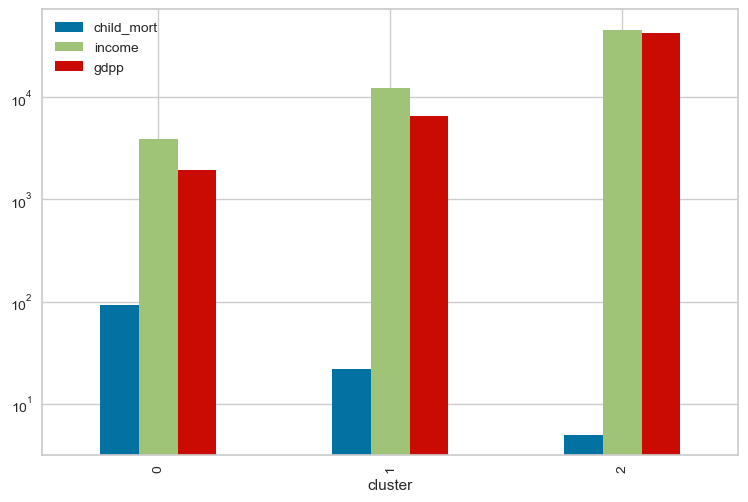

In [65]:
#Visualising the profiled variables of the dataset via barplot
df_cluster.plot(kind='bar',logy=True);

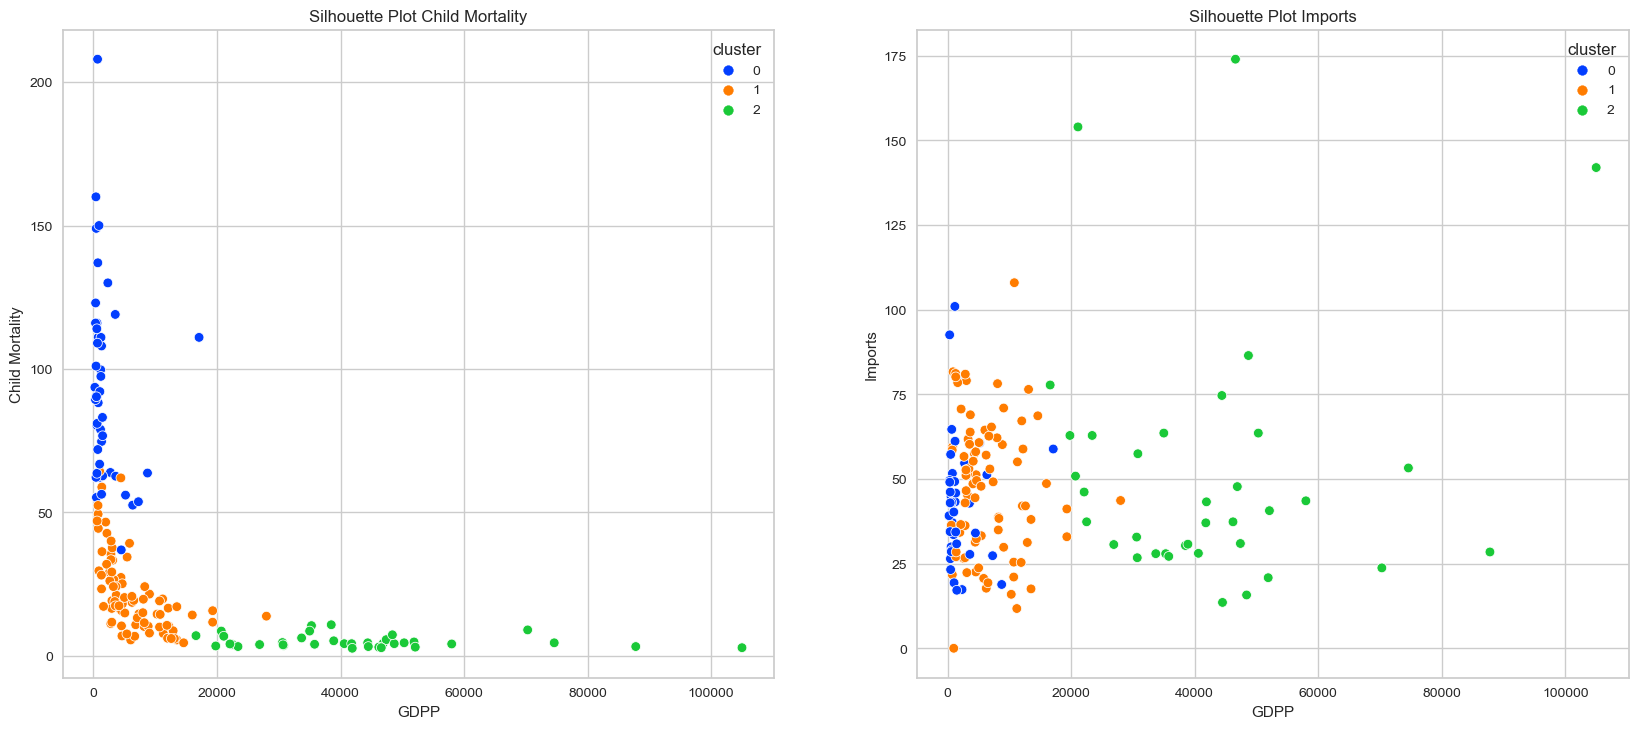

In [66]:
plt.figure(figsize = (18,8))
plt.subplot(1, 2, 1)
sns.scatterplot(x = 'gdpp', y = 'child_mort', data =df_kmeans_3, hue = 'cluster', palette = 'bright')
plt.title('Silhouette Plot Child Mortality')
plt.xlabel('GDPP')
plt.ylabel('Child Mortality')
plt.subplot(1, 2, 2)
sns.scatterplot(x = 'gdpp', y = 'imports', data = df_kmeans_3, hue = 'cluster', palette = 'bright')
plt.title('Silhouette Plot Imports')
plt.xlabel('GDPP')
plt.ylabel('Imports')
plt.show()

In [67]:
df_pair_plot=pd.DataFrame(reduced_cr,columns=['PC_' +str(i) for i in range(5)])

In [68]:
df_pair_plot['Cluster']= kmeans_3.labels_ #Add cluster column in the data frame

In [69]:
df_pair_plot.head()

PC_0      PC_1      PC_2      PC_3      PC_4  Cluster
0 -2.913025  0.095621 -0.718118  1.005255 -0.158310        0
1  0.429911 -0.588156 -0.333486 -1.161059  0.174677        1
2 -0.285225 -0.455174  1.221505 -0.868115  0.156475        1
3 -2.932423  1.695555  1.525044  0.839625 -0.273209        0
4  1.033576  0.136659 -0.225721 -0.847063 -0.193007        1

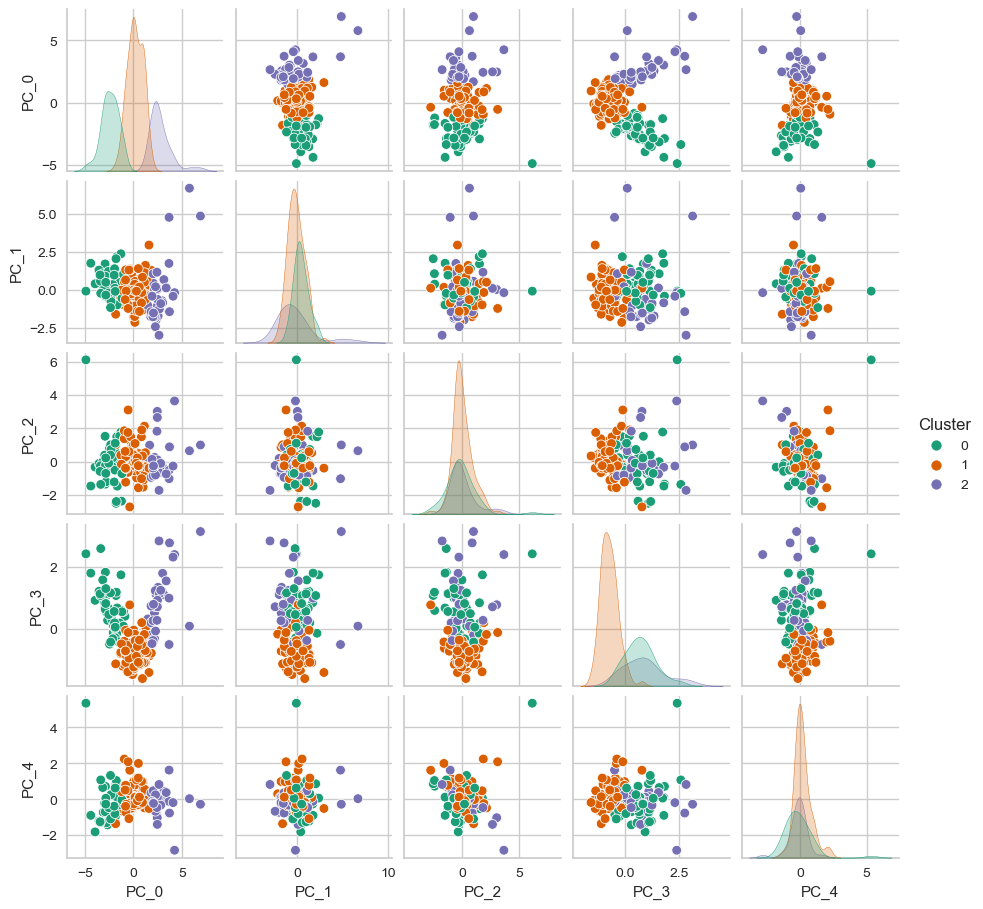

In [70]:
#pairwise relationship of components on the data
sns.pairplot(df_pair_plot,hue='Cluster', palette= 'Dark2', diag_kind='kde',size=1.85)

In [71]:
df_kmeans_3['cluster'].loc[df_kmeans_3['cluster'] == 0] = 'Help Needed'
df_kmeans_3['cluster'].loc[df_kmeans_3['cluster'] == 1] = 'Might Need Help'
df_kmeans_3['cluster'].loc[df_kmeans_3['cluster'] == 2] = 'No Help Needed'

fig = px.choropleth(df_kmeans_3[['country','cluster']],
                    locationmode = 'country names',
                    locations = 'country',
                    title = 'Needed Help Per Country',
                    color = df_kmeans_3['cluster'],  
                    color_discrete_map = {'Help Needed':'Red',
                                        
                                        'Might Need Help':'Yellow',
                                         'No Help Needed':'Green'}
                   )
fig.update_geos(fitbounds = "locations", visible = True)
fig.update_layout(legend_title_text = 'Labels',legend_title_side = 'top',title_pad_l = 260,title_y = 0.86)
fig.show(engine = 'kaleido')

### 4. Heirarchichal Clustering

In [72]:
distance = linkage(country_pca,'ward')

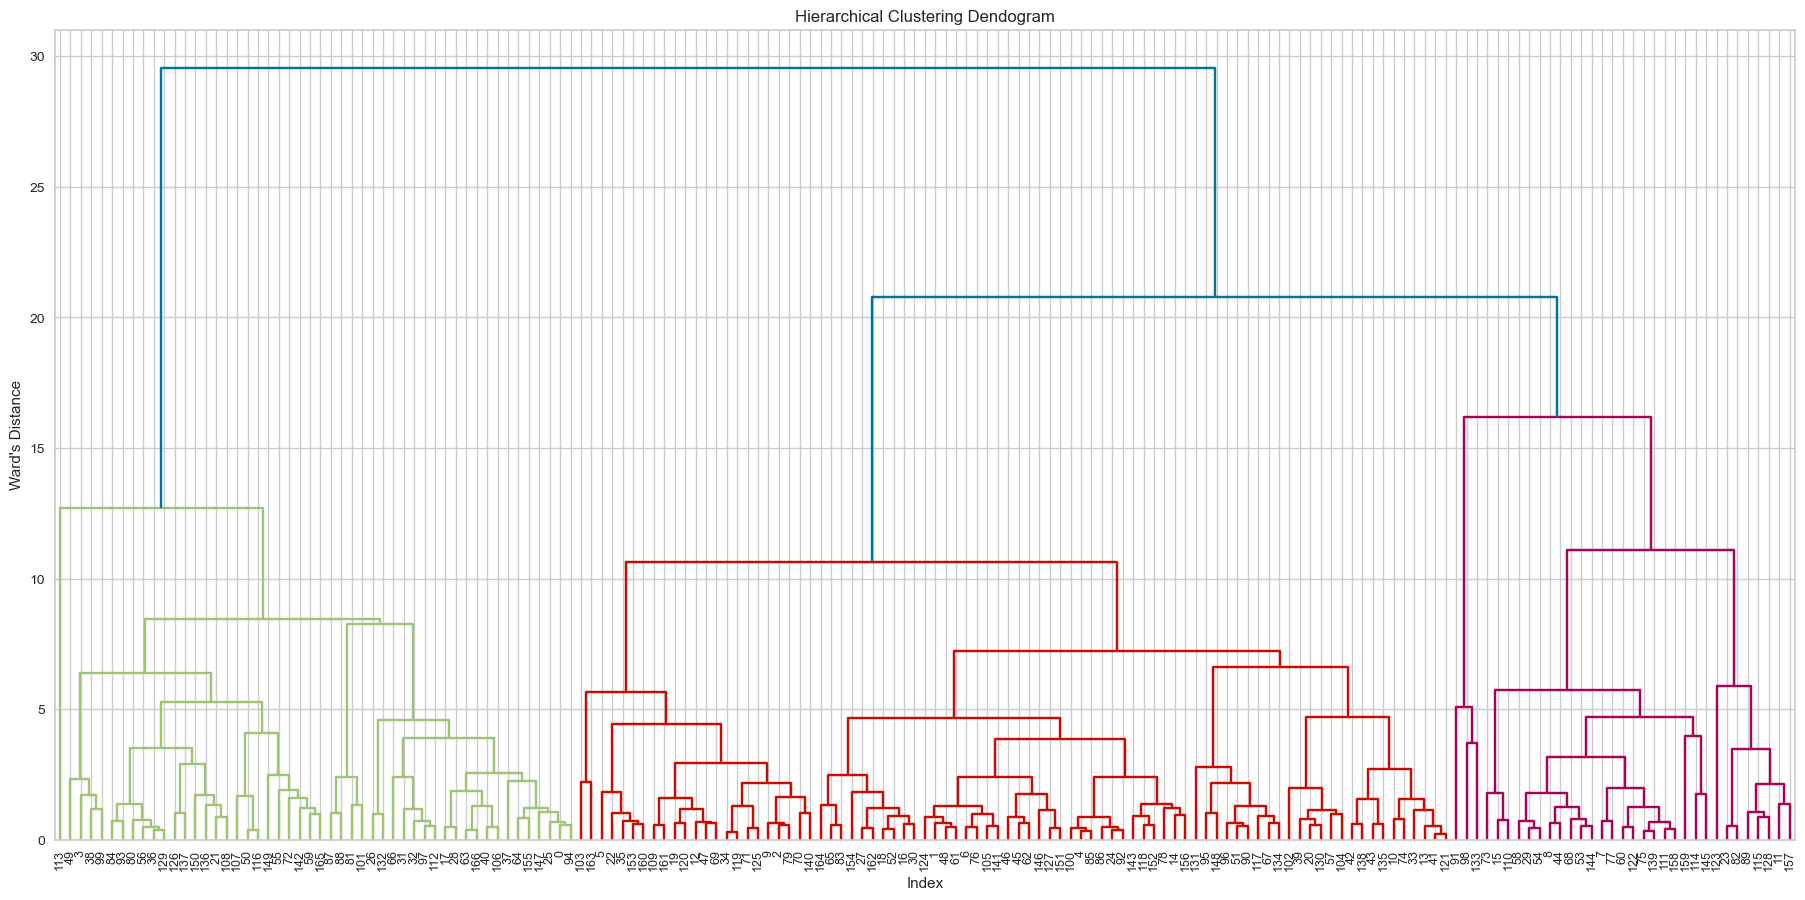

In [73]:
plt.figure(figsize=(20,10))
plt.title("Hierarchical Clustering Dendogram")
plt.xlabel("Index")
plt.ylabel("Ward's Distance")
dendrogram(distance, leaf_rotation=90, leaf_font_size=9);
plt.axhline(98, c='k')

- Based on above complete linkage, Creating the hierarchichal clustering model by taking n = 3

In [74]:
df_Heirarchichal= df.copy()

In [75]:
# 3 clusters
cluster_H = cut_tree(distance, n_clusters=3).reshape(-1, )
cluster_H

array([0, 1, 1, 0, 1, 1, 1, 2, 2, 1, 1, 2, 1, 1, 1, 2, 1, 0, 1, 1, 1, 0,
       1, 2, 1, 0, 0, 1, 0, 2, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       2, 1, 1, 1, 1, 0, 0, 1, 1, 2, 2, 0, 0, 1, 2, 0, 2, 1, 1, 0, 0, 1,
       0, 1, 2, 1, 1, 1, 0, 2, 1, 2, 1, 2, 1, 1, 0, 0, 2, 1, 0, 1, 1, 0,
       0, 2, 1, 2, 1, 0, 0, 1, 1, 0, 2, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1,
       2, 2, 0, 0, 2, 2, 0, 1, 1, 1, 1, 1, 2, 2, 1, 1, 0, 1, 2, 0, 1, 1,
       0, 2, 1, 1, 0, 0, 1, 2, 1, 1, 0, 1, 2, 2, 1, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 2, 2, 2, 1, 1, 1, 1, 1, 0, 0])

In [76]:
# assign cluster labels
df_Heirarchichal['cluster_H'] = cluster_H
df_Heirarchichal.head()

country  child_mort  exports  health  imports  income  \
0          Afghanistan        90.2     10.0    7.58     44.9    1610   
1              Albania        16.6     28.0    6.55     48.6    9930   
2              Algeria        27.3     38.4    4.17     31.4   12900   
3               Angola       119.0     62.3    2.85     42.9    5900   
4  Antigua and Barbuda        10.3     45.5    6.03     58.9   19100   

   inflation  life_expec  total_fer   gdpp  cluster_H  
0       9.44        56.2       5.82    553          0  
1       4.49        76.3       1.65   4090          1  
2      16.10        76.5       2.89   4460          1  
3      22.40        60.1       6.16   3530          0  
4       1.44        76.8       2.13  12200          1

In [77]:
pd.Series(cluster_H).value_counts()

1    84
0    50
2    33
dtype: int64

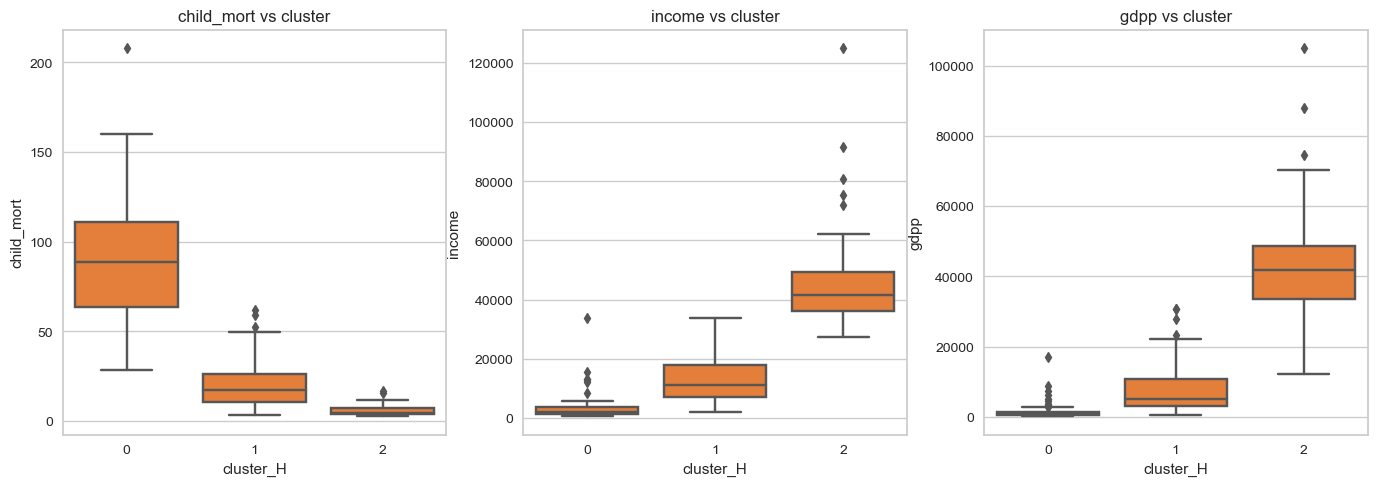

In [78]:
fig, ax = plt.subplots(nrows = 1, ncols = 3, figsize = (15,5))

plt.subplot(1,3,1)
sns.boxplot(x = 'cluster_H', y = 'child_mort', data  = df_Heirarchichal, color = '#FF781F');
plt.title('child_mort vs cluster')

plt.subplot(1,3,2)
sns.boxplot(x = 'cluster_H', y = 'income', data  = df_Heirarchichal, color = '#FF781F');
plt.title('income vs cluster')

plt.subplot(1,3,3)
sns.boxplot(x = 'cluster_H', y = 'gdpp', data  = df_Heirarchichal, color = '#FF781F');
plt.title('gdpp vs cluster')
plt.show()

- Countries with low gdpp,income and high child mortality are Under-developed countries (cluster = 0)
- Countries with medium gdpp,income and child mortality are Developing countries (cluster = 1)
- Countries with high gdpp,income and low child mortality are Developed countries (cluster= 2)

- From the above plot we can conclude :
   - 0 : Help Needed
   - 1 : Might Need Help
   - 2 : No Help Needed

In [79]:
#Cluster profiling is based on major three factors:1-Child Mortality 2- Income 3-gdpp
#Creating a new dataframe for these variable along with the cluster 
df_clusterH = df_Heirarchichal[['child_mort','income','gdpp','cluster_H']]
df_clusterH = df_clusterH.groupby('cluster_H').mean()
df_clusterH

child_mort        income          gdpp
cluster_H                                        
0           90.034000   3882.660000   1909.800000
1           20.134524  12864.642857   7527.666667
2            6.003030  48133.333333  43551.515152

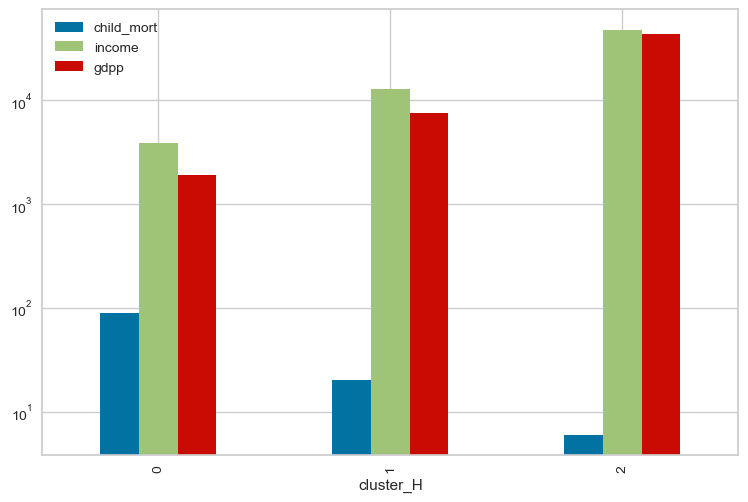

In [80]:
#Visualising the profiled variables of the dataset via barplot
df_clusterH.plot(kind='bar',logy=True);

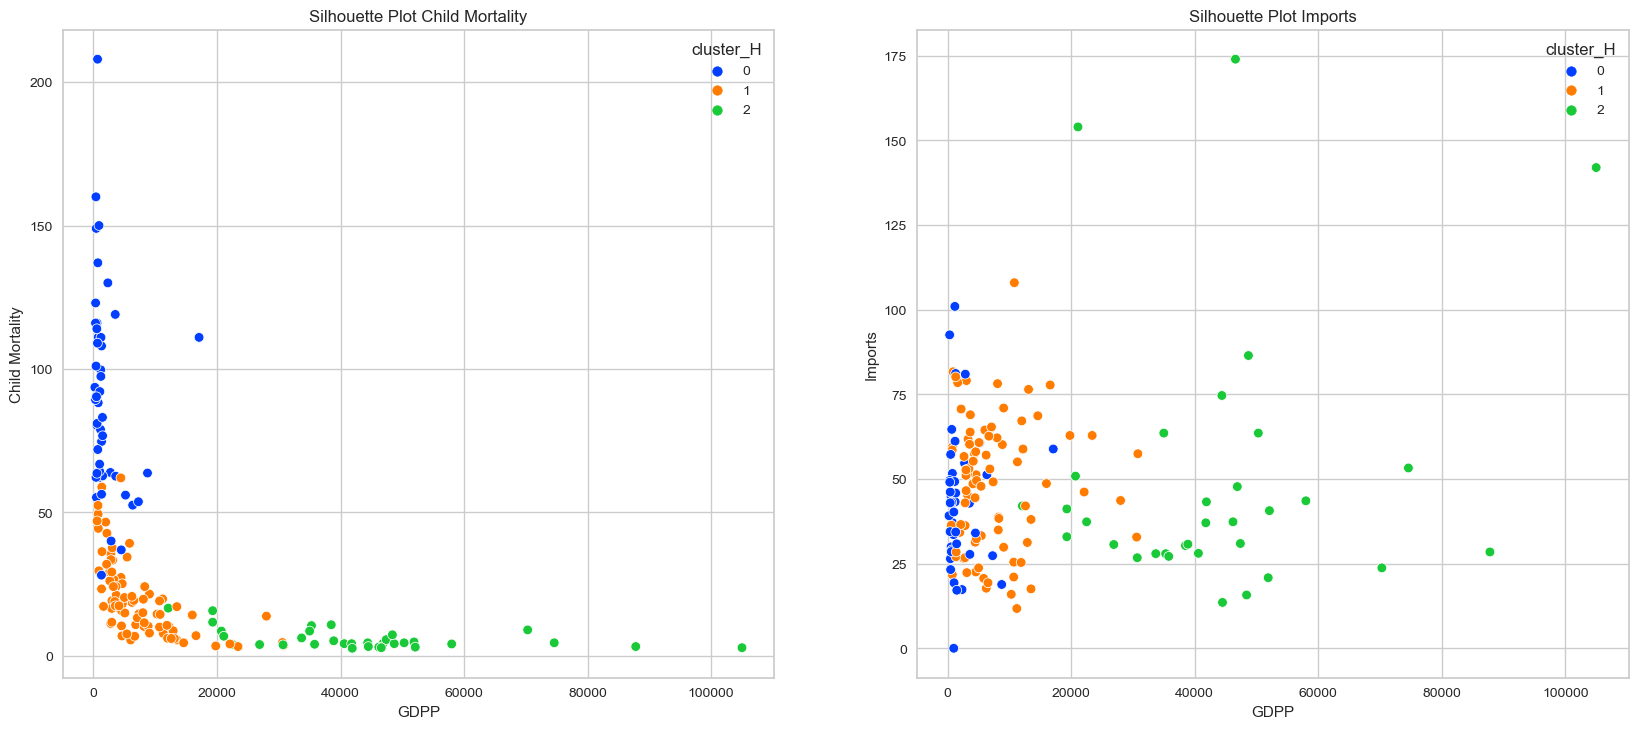

In [81]:
plt.figure(figsize = (18,8))
plt.subplot(1, 2, 1)
sns.scatterplot(x = 'gdpp', y = 'child_mort', data =df_Heirarchichal, hue = 'cluster_H', palette = 'bright')
plt.title('Silhouette Plot Child Mortality')
plt.xlabel('GDPP')
plt.ylabel('Child Mortality')
plt.subplot(1, 2, 2)
sns.scatterplot(x = 'gdpp', y = 'imports', data = df_Heirarchichal, hue = 'cluster_H', palette = 'bright')
plt.title('Silhouette Plot Imports')
plt.xlabel('GDPP')
plt.ylabel('Imports')
plt.show()

In [82]:
df_pair_plotH=pd.DataFrame(reduced_cr,columns=['PC_' +str(i) for i in range(5)])

In [83]:
df_pair_plotH['Cluster_H']= cluster_H #Add cluster column in the data frame

In [84]:
df_pair_plotH.head()

PC_0      PC_1      PC_2      PC_3      PC_4  Cluster_H
0 -2.913025  0.095621 -0.718118  1.005255 -0.158310          0
1  0.429911 -0.588156 -0.333486 -1.161059  0.174677          1
2 -0.285225 -0.455174  1.221505 -0.868115  0.156475          1
3 -2.932423  1.695555  1.525044  0.839625 -0.273209          0
4  1.033576  0.136659 -0.225721 -0.847063 -0.193007          1

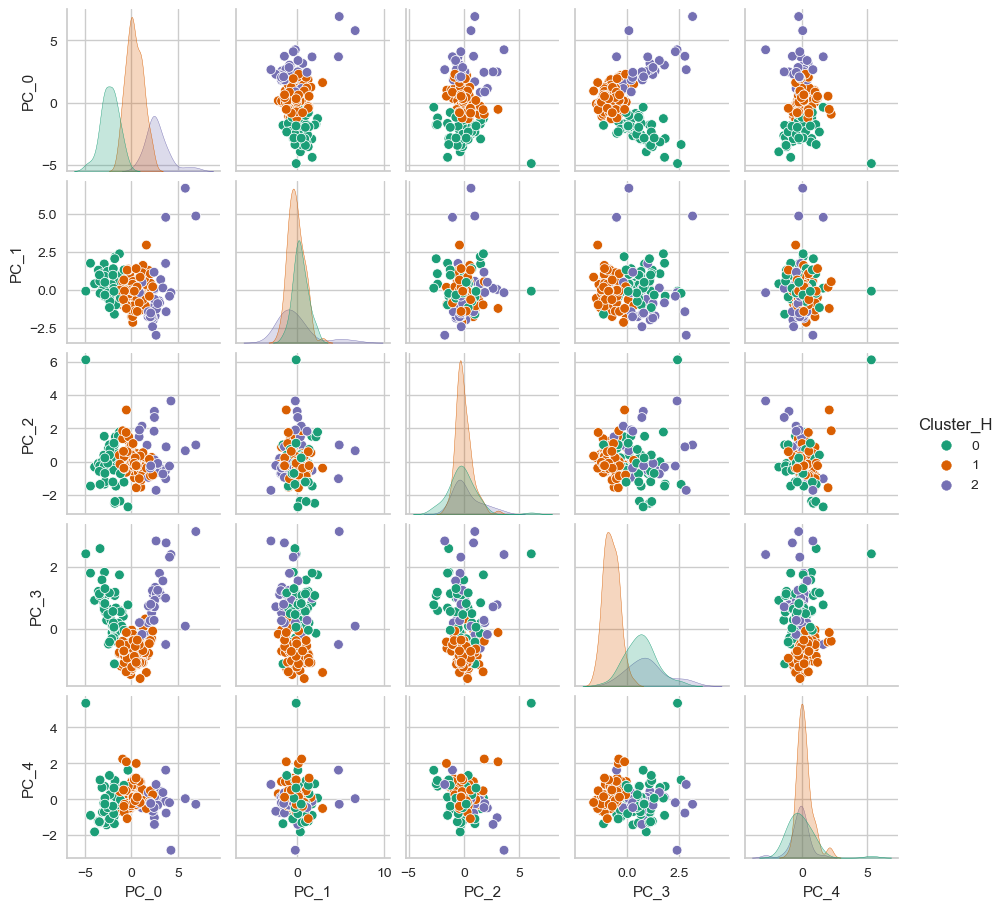

In [85]:
#pairwise relationship of components on the data
sns.pairplot(df_pair_plotH,hue='Cluster_H', palette= 'Dark2', diag_kind='kde',size=1.85)

In [86]:
df_Heirarchichal['cluster_H'].loc[df_Heirarchichal['cluster_H'] == 0] = 'Help Needed'
df_Heirarchichal['cluster_H'].loc[df_Heirarchichal['cluster_H'] == 1] = 'Might Need Help'
df_Heirarchichal['cluster_H'].loc[df_Heirarchichal['cluster_H'] == 2] = 'No Help Needed'

fig = px.choropleth(df_Heirarchichal[['country','cluster_H']],
                    locationmode = 'country names',
                    locations = 'country',
                    title = 'Needed Help Per Country',
                    color = df_Heirarchichal['cluster_H'],  
                    color_discrete_map = {'Help Needed':'Red',
                                        
                                        'Might Need Help':'Yellow',
                                         'No Help Needed':'Green'}
                   )
fig.update_geos(fitbounds = "locations", visible = True)
fig.update_layout(legend_title_text = 'Labels',legend_title_side = 'top',title_pad_l = 260,title_y = 0.86)
fig.show(engine = 'kaleido')

##### - We can see that both K means and Hierarchical clustering with K=3 gave us similar results.

###  5. DBSCAN clustering algorithm

In [87]:
df_DBScan =  df.copy()

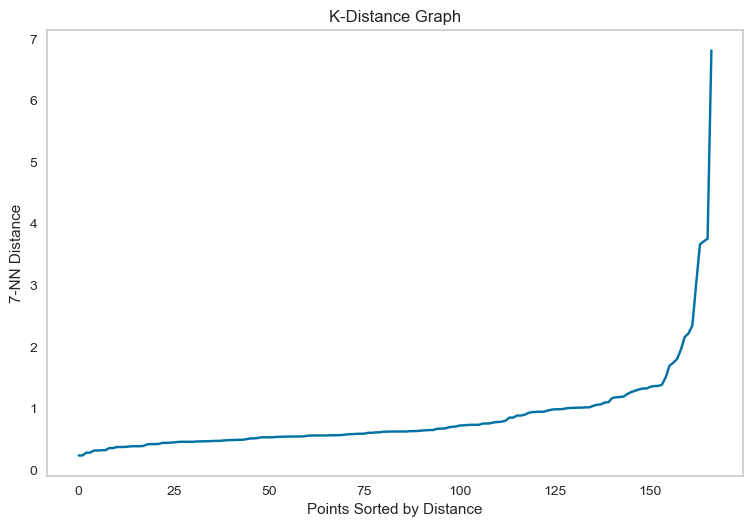

In [88]:
knn = NearestNeighbors(n_neighbors = 7)
model = knn.fit(country_pca)
distances, indices = knn.kneighbors(country_pca)
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.grid()
plt.plot(distances);
plt.xlabel('Points Sorted by Distance')
plt.ylabel('7-NN Distance')
plt.title('K-Distance Graph');

In [115]:
epsilons= np.linspace(0.01,1,num=15)
epsilons

array([0.01      , 0.08071429, 0.15142857, 0.22214286, 0.29285714,
       0.36357143, 0.43428571, 0.505     , 0.57571429, 0.64642857,
       0.71714286, 0.78785714, 0.85857143, 0.92928571, 1.        ])

In [116]:
min_samples= np.arange(2,9,step=1)
min_samples

array([2, 3, 4, 5, 6, 7, 8])

In [117]:
import itertools
combinations= list(itertools.product(epsilons,min_samples))
combinations

[(0.01, 2),
 (0.01, 3),
 (0.01, 4),
 (0.01, 5),
 (0.01, 6),
 (0.01, 7),
 (0.01, 8),
 (0.08071428571428571, 2),
 (0.08071428571428571, 3),
 (0.08071428571428571, 4),
 (0.08071428571428571, 5),
 (0.08071428571428571, 6),
 (0.08071428571428571, 7),
 (0.08071428571428571, 8),
 (0.15142857142857144, 2),
 (0.15142857142857144, 3),
 (0.15142857142857144, 4),
 (0.15142857142857144, 5),
 (0.15142857142857144, 6),
 (0.15142857142857144, 7),
 (0.15142857142857144, 8),
 (0.22214285714285714, 2),
 (0.22214285714285714, 3),
 (0.22214285714285714, 4),
 (0.22214285714285714, 5),
 (0.22214285714285714, 6),
 (0.22214285714285714, 7),
 (0.22214285714285714, 8),
 (0.29285714285714287, 2),
 (0.29285714285714287, 3),
 (0.29285714285714287, 4),
 (0.29285714285714287, 5),
 (0.29285714285714287, 6),
 (0.29285714285714287, 7),
 (0.29285714285714287, 8),
 (0.3635714285714286, 2),
 (0.3635714285714286, 3),
 (0.3635714285714286, 4),
 (0.3635714285714286, 5),
 (0.3635714285714286, 6),
 (0.3635714285714286, 7),
 (0.

In [118]:
N=len(combinations)
N

105

In [119]:
def get_scores_and_labels(combinations,country_pca):
    scores=[]
    all_labels_list=[]
    for i , (eps,num_samples) in enumerate (combinations):
        dbscan_cluster_model=DBSCAN(eps=eps,min_samples=num_samples).fit(country_pca)
        labels= dbscan_cluster_model.labels_
        labels_set= set(labels)
        num_clusters= len(labels_set)
        if -1 in labels_set:
            num_clusters-=1
        if (num_clusters<2) or (num_clusters>50):
            scores.append(-10)
            all_labels_list.append('bad')
            c=(eps,num_samples)
            print(f'combination{c} on iteration {i+1} of {N} has {num_clusters}clusters.Moving on')
            continue
        scores.append (silhouette_score(country_pca,labels))
        all_labels_list.append(labels)
        print (f'Index:{i},Score:{scores[-1]}, Labels: {all_labels_list[-1]},NumClusters :{num_clusters}')
    best_index= np.argmax (scores)
    best_parameters=combinations[ best_index] 
    best_labels= all_labels_list [best_index]
    best_score= scores[best_index] 
    return{'best_epsilon': best_parameters[0],
            'best_min_samples': best_parameters[1],
            'best_labels':best_labels, 
            'best_score': best_score}
best_dict= get_scores_and_labels(combinations, country_pca)

combination(0.01, 2) on iteration 1 of 105 has 0clusters.Moving on
combination(0.01, 3) on iteration 2 of 105 has 0clusters.Moving on
combination(0.01, 4) on iteration 3 of 105 has 0clusters.Moving on
combination(0.01, 5) on iteration 4 of 105 has 0clusters.Moving on
combination(0.01, 6) on iteration 5 of 105 has 0clusters.Moving on
combination(0.01, 7) on iteration 6 of 105 has 0clusters.Moving on
combination(0.01, 8) on iteration 7 of 105 has 0clusters.Moving on
combination(0.08071428571428571, 2) on iteration 8 of 105 has 0clusters.Moving on
combination(0.08071428571428571, 3) on iteration 9 of 105 has 0clusters.Moving on
combination(0.08071428571428571, 4) on iteration 10 of 105 has 0clusters.Moving on
combination(0.08071428571428571, 5) on iteration 11 of 105 has 0clusters.Moving on
combination(0.08071428571428571, 6) on iteration 12 of 105 has 0clusters.Moving on
combination(0.08071428571428571, 7) on iteration 13 of 105 has 0clusters.Moving on
combination(0.08071428571428571, 8)

In [97]:
best_dict

{'best_epsilon': 1.0,
 'best_min_samples': 5,
 'best_labels': array([ 0,  0,  0, -1,  0, -1,  0,  1,  1,  0,  0, -1,  0,  0, -1, -1,  0,
         0,  0,  0,  0, -1,  0, -1,  0,  0, -1,  0,  0,  1,  0,  0,  0,  0,
         0,  0,  0, -1, -1,  0,  0,  0,  0,  0,  1,  0,  0,  0,  0, -1, -1,
         0,  0,  1,  1, -1,  0,  0,  1,  0,  1,  0,  0,  0,  0,  0, -1,  0,
         1,  0,  0,  0, -1, -1,  0,  1,  0,  1, -1,  0,  0, -1, -1,  0,  0,
         0,  0, -1, -1, -1,  0, -1,  0,  0,  0, -1,  0,  0, -1, -1,  0, -1,
        -1, -1,  0,  0,  0, -1,  0,  0, -1,  1,  0, -1, -1, -1, -1,  0,  0,
         0,  0,  0,  1, -1,  0,  0, -1,  0, -1,  0,  0, -1, -1, -1,  0,  0,
        -1, -1,  0,  1, -1,  0, -1,  0,  1, -1,  0,  0,  0, -1, -1,  0,  0,
         0, -1,  0, -1, -1,  1, -1,  0,  0,  0, -1, -1, -1,  0],
       dtype=int64),
 'best_score': 0.1152451219896865}

In [120]:
df_DBScan['cluster']=best_dict['best_labels']
df_DBScan['cluster'].value_counts()

 0    72
-1    56
 2    22
 1    17
Name: cluster, dtype: int64

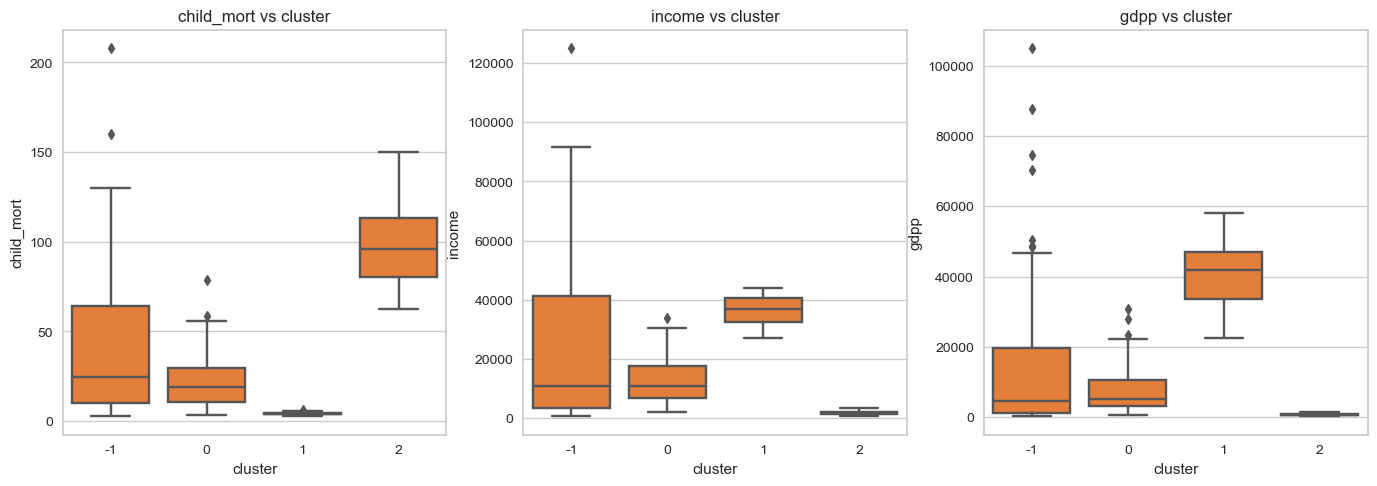

In [121]:
fig, ax = plt.subplots(nrows = 1, ncols = 3, figsize = (15,5))

plt.subplot(1,3,1)
sns.boxplot(x = 'cluster', y = 'child_mort', data  = df_DBScan, color = '#FF781F');
plt.title('child_mort vs cluster')

plt.subplot(1,3,2)
sns.boxplot(x = 'cluster', y = 'income', data  = df_DBScan, color = '#FF781F');
plt.title('income vs cluster')

plt.subplot(1,3,3)
sns.boxplot(x = 'cluster', y = 'gdpp', data  = df_DBScan, color = '#FF781F');
plt.title('gdpp vs cluster')
plt.show()

-  Noise / Outliers (cluster = -1)
- Countries with medium gdpp,income and child mortality are Developing countries (cluster = 0)
- Countries with high gdpp,income and low child mortality are Developed countries (cluster= 1)
- Countries with low gdpp,income and high child mortality are Under-developed countries (cluster= 2)
- By rule -1 is associated with Noise / Outliers!
- From the above plot we can conclude :
     - -1 : Noise / Outliers
     - 0 : Might Need Help
     - 1 : No Help Needed
     - 2 : Help Needed


In [122]:
#Cluster profiling is based on major three factors:1-Child Mortality 2- Income 3-gdpp
#Creating a new dataframe for these variable along with the cluster 
df_clusterDB = df_DBScan[['child_mort','income','gdpp','cluster']]
df_clusterDB= df_clusterDB.groupby('cluster').mean()
df_clusterDB

child_mort        income          gdpp
cluster                                        
-1        45.732143  23063.625000  16558.642857
 0        21.936111  12578.750000   7370.333333
 1         4.152941  36858.823529  40611.764706
 2        99.095455   1787.727273    757.545455

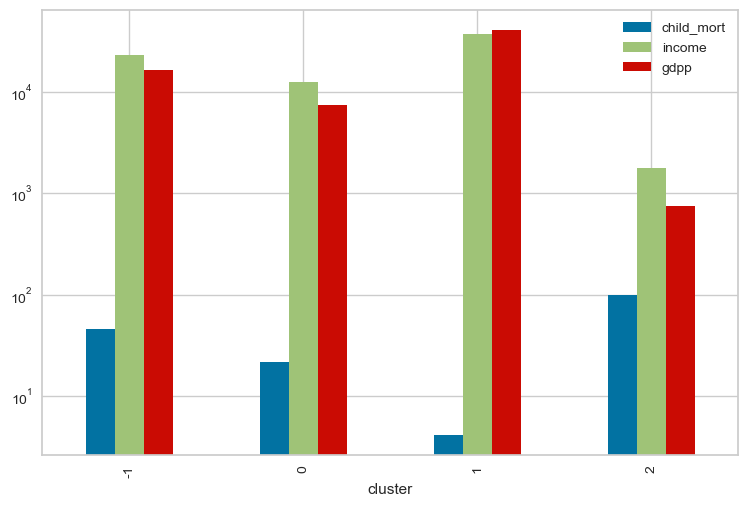

In [123]:
#Visualising the profiled variables of the dataset via barplot
df_clusterDB.plot(kind='bar',logy=True);

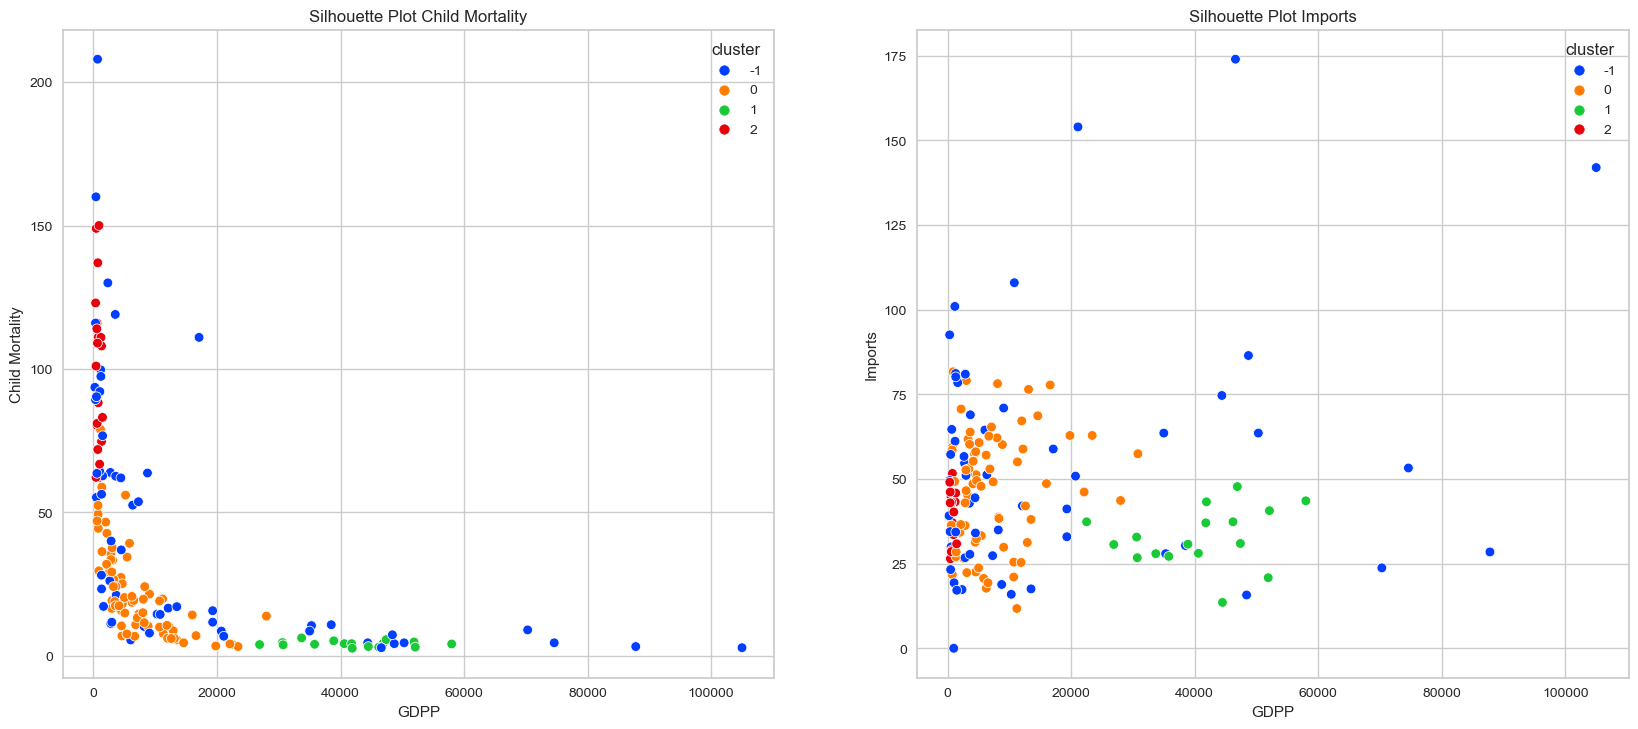

In [124]:
plt.figure(figsize = (18,8))
plt.subplot(1, 2, 1)
sns.scatterplot(x = 'gdpp', y = 'child_mort', data =df_DBScan, hue = 'cluster', palette = 'bright')
plt.title('Silhouette Plot Child Mortality')
plt.xlabel('GDPP')
plt.ylabel('Child Mortality')
plt.subplot(1, 2, 2)
sns.scatterplot(x = 'gdpp', y = 'imports', data = df_DBScan, hue = 'cluster', palette = 'bright')
plt.title('Silhouette Plot Imports')
plt.xlabel('GDPP')
plt.ylabel('Imports')
plt.show()

In [125]:
df_pair_plotDB=pd.DataFrame(reduced_cr,columns=['PC_' +str(i) for i in range(5)])

In [126]:
df_pair_plotDB['Cluster']= best_dict['best_labels'] #Add cluster column in the data frame

In [127]:
df_pair_plotDB.head()

PC_0      PC_1      PC_2      PC_3      PC_4  Cluster
0 -2.913025  0.095621 -0.718118  1.005255 -0.158310        2
1  0.429911 -0.588156 -0.333486 -1.161059  0.174677        0
2 -0.285225 -0.455174  1.221505 -0.868115  0.156475        0
3 -2.932423  1.695555  1.525044  0.839625 -0.273209       -1
4  1.033576  0.136659 -0.225721 -0.847063 -0.193007        0

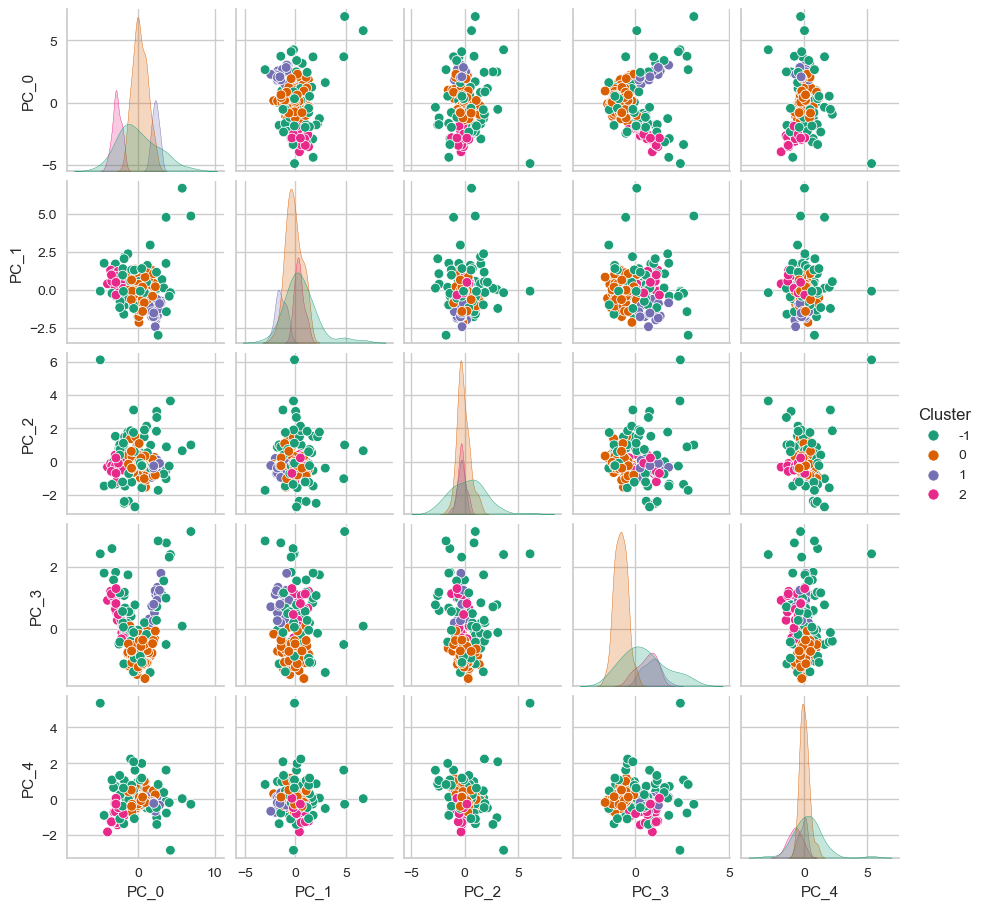

In [128]:
#pairwise relationship of components on the data
sns.pairplot(df_pair_plotDB,hue='Cluster', palette= 'Dark2', diag_kind='kde',size=1.85)

In [130]:
df_DBScan['cluster'].loc[df_DBScan['cluster'] == -1] = 'Noise / Outliers'
df_DBScan['cluster'].loc[df_DBScan['cluster'] == 0] = 'Might Need Help'
df_DBScan['cluster'].loc[df_DBScan['cluster'] == 1] = 'No Help Needed'
df_DBScan['cluster'].loc[df_DBScan['cluster'] == 2] = 'Help Needed'

fig = px.choropleth(df_DBScan[['country','cluster']],
                    locationmode = 'country names',
                    locations = 'country',
                    title = 'Needed Help Per country',
                    color = df_DBScan['cluster'],  
                    color_discrete_map = {'Noise / Outliers' : 'Black',
                                        'Help Needed':'Red',
                                        'Might Need Help':'Yellow',
                                        'No Help Needed':'Green'})
                                        
                                        
                   
fig.update_geos(fitbounds = "locations", visible = True)
fig.update_layout(legend_title_text = 'Labels',legend_title_side = 'top',title_pad_l = 260,title_y = 0.86)
fig.show(engine = 'kaleido')

### Conclusion
- K-Means Clustering, Hierarchical Clustering and DBSCAN Clustering are fundamentally different. They are based on different principles, thus displaying the difference in the model performances. Overall the model performances are not as great.